---
Notebook created by : Stefanus Yudi Irwan <br>
Date : September 22th 2022 <br>
Linkedin : https://www.linkedin.com/in/stefanusyudi22/
---

# A. Import Necesarry Data and Library for Data Analysis

Import the python library for data analysis such as pandas, numpy, matplotlib, seaborn, and scikitlean

In [27]:
import pandas as pd                                   # pandas for data frame
import numpy as np                                    # numpy for mathematic functions
import matplotlib.pyplot as plt                       # matplotlib and seaborn for plotting data
from matplotlib.cbook import boxplot_stats            # extra library for identifying outliers
import seaborn as sns                                 # for plotting graph
from sklearn.linear_model import LinearRegression     # for linear regresion
from scipy.stats import ttest_ind                     # for statistical test
from scipy.stats import t                             # for statistical test

---
# B. Skimming Data

Skim through your data to know the **amount of column, amount of row, and data type** from every row and knowing whether your data is already clean or require futher cleansing to start the data analysis.

In [3]:
data_source = pd.read_csv("data_source/insurance.csv")     # import the data source
data_source.head(n=10)

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160
6   46  female  33.440         1     no  southeast   8240.58960
7   37  female  27.740         3     no  northwest   7281.50560
8   37    male  29.830         2     no  northeast   6406.41070
9   60  female  25.840         0     no  northwest  28923.13692

In [4]:
data_source.isnull().sum()     # check for empty value in every column

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
data_source.describe()     # know the common descriptive statistic for every numeric data

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [6]:
# find the unique value for categorical data
print("Sex Column has unique values", data_source["sex"].unique())
print("Smoker Column has unique values", data_source["smoker"].unique())
print("Region Column has unique values", data_source["region"].unique())

Sex Column has unique values ['female' 'male']
Smoker Column has unique values ['yes' 'no']
Region Column has unique values ['southwest' 'southeast' 'northwest' 'northeast']


From this data skimming we know some important info :
- the data comprises of **1388 rows** and **7 columns**
- the data comprises of **3 categorical data** (Sex, Smoker, and Region)
- the data comprises of **4 numerical data** (Age, BMI, Children, and Charges)
- the data **already clean** and ready for analysis

---
# C. Data Analysis

## Step 1 : Descriptive Statistic Analysis

___
### Analysis on Age

####  1. Age Distribution Data

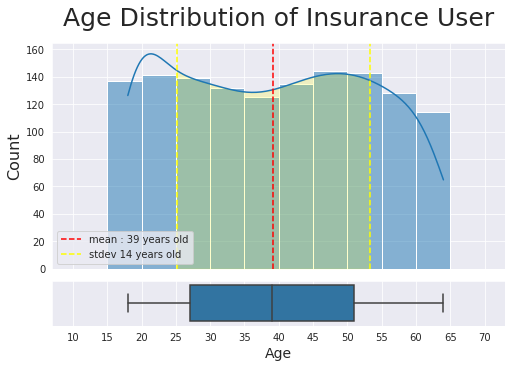

In [51]:
# create figure and axes for plot data
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(7,5), constrained_layout=True, gridspec_kw={'height_ratios':[5,1]},
                      sharex=True)

# set grid theme
sns.set_style("darkgrid")

# create age histogram plot
ax[0] = sns.histplot(data=data_source, x="age", bins=np.arange(10,75,5), ax=ax[0], kde=True)
ax[0].set_title("Age Distribution of Insurance User", fontsize=25, y=1.05)
ax[0].axvline(x=data_source.age.mean(), color="red", linestyle="--", label=f"mean : {data_source.age.mean():.0f} years old")
ax[0].axvline(x=data_source.age.mean()+data_source.age.std(), color="yellow", linestyle="--", label=f"stdev {data_source.age.std():.0f} years old")
ax[0].axvline(x=data_source.age.mean()-data_source.age.std(), color="yellow", linestyle="--")
kde_x, kde_y = ax[0].lines[0].get_data()
ax[0].fill_between(kde_x, kde_y, where=(kde_x>data_source.age.mean()-data_source.age.std())
                   & (kde_x<data_source.age.mean()+data_source.age.std()), color='yellow', alpha=0.2)
ax[0].set_xlabel("Age", fontsize=16)
ax[0].set_ylabel("Count", fontsize=16)
ax[0].legend()

# create age boxplot
sns.boxplot(data=data_source, x="age", ax=ax[1])
ax[1].set_xlabel("Age", fontsize=14)
xaxis_value = np.arange(10,75,5)
ax[1].set_xticks(xaxis_value)

# show the plot
plt.show()

__Note :__
- Because of age distribution is forming **uniform distribution**, we can use __average__ and __standar deviation__ as central tendencies measurement.
- Average age of insurance user is **39 years old** with standar deviation **14 years old**.
- We can state that the overall insurance age user is around **25 - 51 years old**.

#### 2. Age Distribution Separated by Smoker

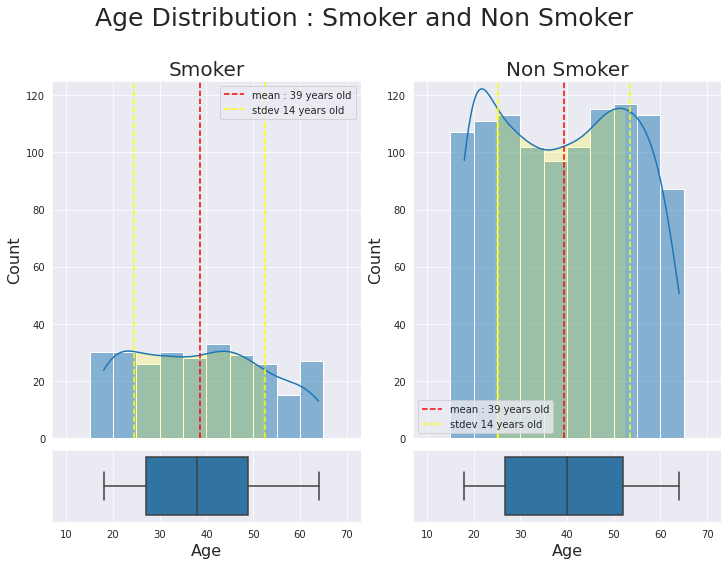

In [50]:
# separate smoker and non smoker data
smoker_data = data_source[data_source["smoker"]=="yes"]
non_smoker_data = data_source[data_source["smoker"]=="no"]

# create figure and axes for plot data
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,7), constrained_layout=True, gridspec_kw={'height_ratios':[5,1]},
                      sharex=True)

# create male distribution plot
sns.set_style("darkgrid")

# create distribution plot for smoker
sns.histplot(data=smoker_data, x="age", ax=ax[0][0], bins=np.arange(10,75,5), kde=True)
sns.boxplot(data=smoker_data, x="age", ax=ax[1][0])
ax[0][0].set_title("Smoker", fontsize=20)
ax[1][0].set_xlabel("Age", fontsize=16)
ax[0][0].set_ylabel("Count", fontsize=16)
ax[0][0].set_ylim([0,125])
ax[0][0].axvline(x=smoker_data.age.mean(), color="red", linestyle="--", label=f"mean : {smoker_data.age.mean():.0f} years old")
ax[0][0].axvline(x=smoker_data.age.mean()+smoker_data.age.std(), color="yellow", linestyle="--", label=f"stdev {smoker_data.age.std():.0f} years old")
ax[0][0].axvline(x=smoker_data.age.mean()-smoker_data.age.std(), color="yellow", linestyle="--")
kde_x_0, kde_y_0 = ax[0][0].lines[0].get_data()
ax[0][0].fill_between(kde_x_0, kde_y_0, where=(kde_x_0>smoker_data.age.mean()-smoker_data.age.std())
                   & (kde_x_0<smoker_data.age.mean()+smoker_data.age.std()), color='yellow', alpha=0.2)
ax[0][0].legend()

# create distribution plot for non smoker
sns.histplot(data=non_smoker_data, x="age", ax=ax[0][1], bins=np.arange(10,75,5), kde=True)
sns.boxplot(data=non_smoker_data, x="age", ax=ax[1][1])
ax[0][1].set_title("Non Smoker", fontsize=20)
ax[1][1].set_xlabel("Age", fontsize=16)
ax[0][1].set_ylabel("Count", fontsize=16)
ax[0][1].set_ylim([0,125])
ax[0][1].axvline(x=non_smoker_data.age.mean(), color="red", linestyle="--", label=f"mean : {non_smoker_data.age.mean():.0f} years old")
ax[0][1].axvline(x=non_smoker_data.age.mean()+non_smoker_data.age.std(), color="yellow", linestyle="--", label=f"stdev {non_smoker_data.age.std():.0f} years old")
ax[0][1].axvline(x=non_smoker_data.age.mean()-non_smoker_data.age.std(), color="yellow", linestyle="--")
kde_x_1, kde_y_1 = ax[0][1].lines[0].get_data()
ax[0][1].fill_between(kde_x_1, kde_y_1, where=(kde_x_1>smoker_data.age.mean()-smoker_data.age.std())
                   & (kde_x_1<smoker_data.age.mean()+smoker_data.age.std()), color='yellow', alpha=0.2)
ax[0][1].legend()

# show the plot
plt.suptitle("Age Distribution : Smoker and Non Smoker", size=25, y=1.1)
plt.show()

__Note :__
- After separated by smoker category variable, the distribution still shaping an acceptable uniform distribution. We still able to use __average__ and __standard deviation__ for it's central tendencies.
- Smoker and non-smoker have same average age of **39 years old** with the same standard deviation **14 years old**.
- Both smoker and non-smoker has exactly the **same mean and standard deviation**.
- **proportion** of smoker within the insurance user is **less than non-smoker**.

#### 3. Age Distribution Separated  By Sex

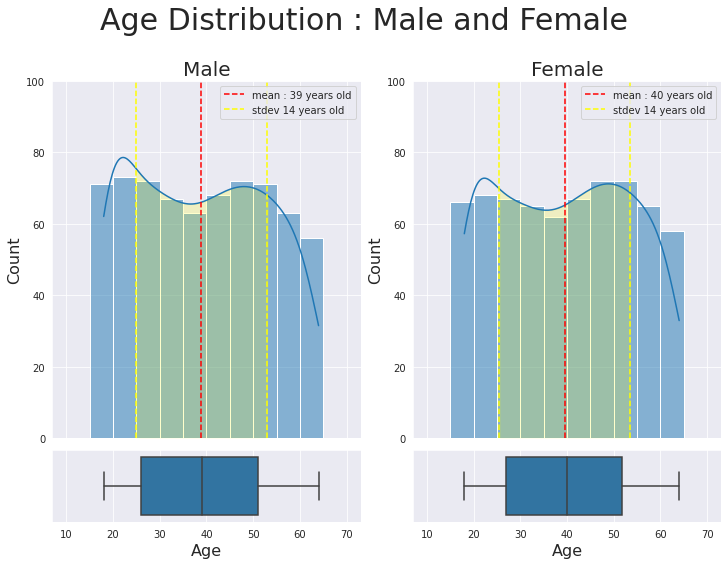

In [31]:
# separate the male and female data
male_data = data_source[data_source["sex"]=="male"]
female_data = data_source[data_source["sex"]=="female"]

# create figure and axes for plot data
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,7), constrained_layout=True, gridspec_kw={'height_ratios':[5,1]},
                      sharex=True)

# set grid theme
sns.set_style("darkgrid")

# create male distribution plot
sns.histplot(data=male_data, x="age", ax=ax[0][0], bins=np.arange(10,75,5), kde=True)
sns.boxplot(data=male_data, x="age", ax=ax[1][0])
ax[0][0].set_title("Male", fontsize=20)
ax[1][0].set_xlabel("Age", fontsize=16)
ax[0][0].set_ylabel("Count", fontsize=16)
ax[0][0].set_ylim([0,100])
ax[0][0].axvline(x=male_data.age.mean(), color="red", linestyle="--", label=f"mean : {male_data.age.mean():.0f} years old")
ax[0][0].axvline(x=male_data.age.mean()+male_data.age.std(), color="yellow", linestyle="--", label=f"stdev {male_data.age.std():.0f} years old")
ax[0][0].axvline(x=male_data.age.mean()-male_data.age.std(), color="yellow", linestyle="--")
kde_x_0, kde_y_0 = ax[0][0].lines[0].get_data()
ax[0][0].fill_between(kde_x_0, kde_y_0, where=(kde_x_0>male_data.age.mean()-male_data.age.std())
                   & (kde_x_0<male_data.age.mean()+male_data.age.std()), color='yellow', alpha=0.2)
ax[0][0].legend()

# create female distribution plot
sns.histplot(data=female_data, x="age", ax=ax[0][1], bins=np.arange(10,75,5), kde=True)
sns.boxplot(data=female_data, x="age", ax=ax[1][1])
ax[0][1].set_title("Female", fontsize=20)
ax[1][1].set_xlabel("Age", fontsize=16)
ax[0][1].set_ylabel("Count", fontsize=16)
ax[0][1].set_ylim([0,100])
ax[0][1].axvline(x=female_data.age.mean(), color="red", linestyle="--", label=f"mean : {female_data.age.mean():.0f} years old")
ax[0][1].axvline(x=female_data.age.mean()+female_data.age.std(), color="yellow", linestyle="--", label=f"stdev {female_data.age.std():.0f} years old")
ax[0][1].axvline(x=female_data.age.mean()-female_data.age.std(), color="yellow", linestyle="--")
kde_x_1, kde_y_1 = ax[0][1].lines[0].get_data()
ax[0][1].fill_between(kde_x_1, kde_y_1, where=(kde_x_1>female_data.age.mean()-female_data.age.std())
                   & (kde_x_1<female_data.age.mean()+female_data.age.std()), color='yellow', alpha=0.2)
ax[0][1].legend()

# show the plot
plt.suptitle("Age Distribution : Male and Female", size=30, y=1.1)
plt.show()

__Note :__
- After separated by gender category variable, the distribution still shaping an acceptable uniform distribution. We still able to use __average__ and __standard deviation__ for the central tendencies.
- Average age of male is **39 years old** while female is **40 years old**, and have same standard deviation **14 years old**.
- Both gender groups has exactly the **same mean and standard deviation**.
- Proportion of male and female in insurance user nearly equal **50:50**.

#### 4. Age Distribution Separated  By Sex and Smoker

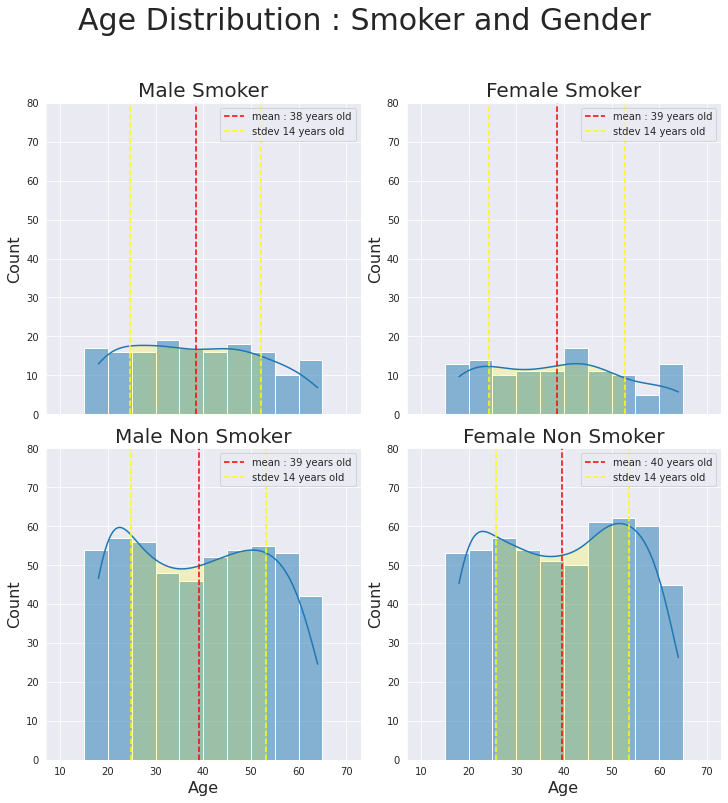

In [9]:
# separate the male and female data
smoker_male_data = data_source[(data_source["sex"]=="male") & (data_source["smoker"]=="yes")]
smoker_female_data = data_source[(data_source["sex"]=="female") & (data_source["smoker"]=="yes")]
non_smoker_male_data = data_source[(data_source["sex"]=="male") & (data_source["smoker"]=="no")]
non_smoker_female_data = data_source[(data_source["sex"]=="female") & (data_source["smoker"]=="no")]

# create figure and axes for plot data
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10), constrained_layout=True, sharex=True)

# set grid theme
sns.set_style("darkgrid")

# create smoker male distribution plot
sns.histplot(data=smoker_male_data, x="age", ax=ax[0][0], bins=np.arange(10,75,5), kde=True)
ax[0][0].set_title("Male Smoker", fontsize=20)
ax[0][0].set_ylabel("Count", fontsize=16)
ax[0][0].set_ylim([0,80])
ax[0][0].axvline(x=smoker_male_data.age.mean(), color="red", linestyle="--", label=f"mean : {smoker_male_data.age.mean():.0f} years old")
ax[0][0].axvline(x=smoker_male_data.age.mean()+smoker_male_data.age.std(), color="yellow", linestyle="--", label=f"stdev {smoker_male_data.age.std():.0f} years old")
ax[0][0].axvline(x=smoker_male_data.age.mean()-smoker_male_data.age.std(), color="yellow", linestyle="--")
kde_x_0, kde_y_0 = ax[0][0].lines[0].get_data()
ax[0][0].fill_between(kde_x_0, kde_y_0, where=(kde_x_0>smoker_male_data.age.mean()-smoker_male_data.age.std())
                      & (kde_x_0<smoker_male_data.age.mean()+smoker_male_data.age.std()),
                      color='yellow', alpha=0.2)
ax[0][0].legend()

# create smoker female distribution plot
sns.histplot(data=smoker_female_data, x="age", ax=ax[0][1], bins=np.arange(10,75,5), kde=True)
ax[0][1].set_title("Female Smoker", fontsize=20)
ax[0][1].set_ylabel("Count", fontsize=16)
ax[0][1].set_ylim([0,80])
ax[0][1].axvline(x=smoker_female_data.age.mean(), color="red", linestyle="--", label=f"mean : {smoker_female_data.age.mean():.0f} years old")
ax[0][1].axvline(x=smoker_female_data.age.mean()+smoker_female_data.age.std(), color="yellow", linestyle="--", label=f"stdev {smoker_female_data.age.std():.0f} years old")
ax[0][1].axvline(x=smoker_female_data.age.mean()-smoker_female_data.age.std(), color="yellow", linestyle="--")
kde_x_1, kde_y_1 = ax[0][1].lines[0].get_data()
ax[0][1].fill_between(kde_x_1, kde_y_1, where=(kde_x_1>smoker_female_data.age.mean()-smoker_female_data.age.std())
                   & (kde_x_1<smoker_female_data.age.mean()+smoker_female_data.age.std()),
                   color='yellow', alpha=0.2)
ax[0][1].legend()

# create non smoker male distribution plot
sns.histplot(data=non_smoker_male_data, x="age", ax=ax[1][0], bins=np.arange(10,75,5), kde=True)
ax[1][0].set_title("Male Non Smoker", fontsize=20)
ax[1][0].set_ylabel("Count", fontsize=16)
ax[1][0].set_xlabel("Age", fontsize=16)
ax[1][0].set_ylim([0,80])
ax[1][0].axvline(x=non_smoker_male_data.age.mean(), color="red", linestyle="--", label=f"mean : {non_smoker_male_data.age.mean():.0f} years old")
ax[1][0].axvline(x=non_smoker_male_data.age.mean()+non_smoker_male_data.age.std(), color="yellow", linestyle="--", label=f"stdev {non_smoker_male_data.age.std():.0f} years old")
ax[1][0].axvline(x=non_smoker_male_data.age.mean()-non_smoker_male_data.age.std(), color="yellow", linestyle="--")
kde_x_2, kde_y_2 = ax[1][0].lines[0].get_data()
ax[1][0].fill_between(kde_x_2, kde_y_2, where=(kde_x_2>non_smoker_male_data.age.mean()-non_smoker_male_data.age.std())
                   & (kde_x_2<non_smoker_male_data.age.mean()+non_smoker_male_data.age.std()),
                   color='yellow', alpha=0.2)
ax[1][0].legend()

# create smoker female distribution plot
sns.histplot(data=non_smoker_female_data, x="age", ax=ax[1][1], bins=np.arange(10,75,5), kde=True)
ax[1][1].set_title("Female Non Smoker", fontsize=20)
ax[1][1].set_ylabel("Count", fontsize=16)
ax[1][1].set_xlabel("Age", fontsize=16)
ax[1][1].set_ylim([0,80])
ax[1][1].axvline(x=non_smoker_female_data.age.mean(), color="red", linestyle="--", label=f"mean : {non_smoker_female_data.age.mean():.0f} years old")
ax[1][1].axvline(x=non_smoker_female_data.age.mean()+non_smoker_female_data.age.std(), color="yellow", linestyle="--", label=f"stdev {non_smoker_female_data.age.std():.0f} years old")
ax[1][1].axvline(x=non_smoker_female_data.age.mean()-non_smoker_female_data.age.std(), color="yellow", linestyle="--")
kde_x_3, kde_y_3 = ax[1][1].lines[0].get_data()
ax[1][1].fill_between(kde_x_3, kde_y_3, where=(kde_x_3>non_smoker_female_data.age.mean()-non_smoker_female_data.age.std())
                   & (kde_x_3<non_smoker_female_data.age.mean()+non_smoker_female_data.age.std()),
                    color='yellow', alpha=0.2)
ax[1][1].legend()

# show the plot
plt.suptitle("Age Distribution : Smoker and Gender", size=30, y=1.1)
plt.show()

__Note :__
- After separated by smoker and sex categories we know average age of insurance user is around **38 - 40 years old**, we could say that the average is at **39 years old** with uniform standard deviation **14 years old**.
- There are **a lot** of **non-smoker** people compare to **smoker** people.
- All historgram forming nearly uniform distribution, hence we are able to use **mean** and **standard deviation** for central tendencies measurement.
- In **smoker people** there are more **male** than **female**, whereas in **non-smoker people** there are more **female** than **male**.

__Summary of Age Analysis__

- Average age of insurance user is **39 years old** with **standard deviation 14 years old**.
- Insurance user age is ranged from **25 years old till 51 years old**, this is I think the productive age of working.
- Smoker and Sex variable **not really contribute to age central tendencies**. But after we separate the age analysis by smoker category we know that the insurance user **mostly** are people who **doesn't smoke cigarettes** and small portion of the insurance user still **smoke cigarettes**.

__Answering Question__<br>
<br>
**1. What is the average of age in the data?** : From the age analysis I found that the average of the age from the data is 39 years old<br>
**2. Is average age of female and male who smoke same?** : From the age analysis I found that the average age of female smoker and male smoker are different, 38 years old compare to 39 years old.

---
### Analysis on BMI

#### 1. BMI Distribution Data

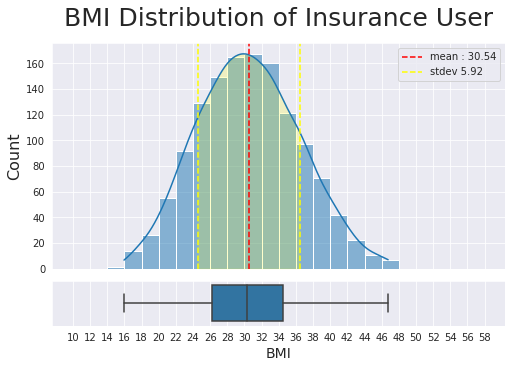

In [133]:
# prepare the data, clean from outlier
bmi_outlier = boxplot_stats(data_source["bmi"]).pop(0)['fliers']
bmi_data = data_source[~data_source["bmi"].isin(bmi_outlier)]["bmi"]

# calculate central tendencies
bmi_mean = bmi_data.mean()
bmi_std = bmi_data.std()

# create figure and axes for plot data
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(7,5), constrained_layout=True, gridspec_kw={'height_ratios':[5,1]},
                      sharex=True)

# set the plot theme
sns.set_style("darkgrid")

# create histogram for BMI
sns.histplot(data=bmi_data, bins=np.arange(10,60,2), ax=ax[0], kde=True)
ax[0].set_title("BMI Distribution of Insurance User", fontsize=25, y=1.05)
ax[0].axvline(x=bmi_mean, color="red", linestyle="--", label=f"mean : {bmi_mean:.2f}")
ax[0].axvline(x=bmi_mean+bmi_std, color="yellow", linestyle="--", label=f"stdev {bmi_std:.2f}")
ax[0].axvline(x=bmi_mean-bmi_std, color="yellow", linestyle="--")
ax[0].set_xlabel("BMI", fontsize=16)
ax[0].set_ylabel("Count", fontsize=16)
kde_x, kde_y = ax[0].lines[0].get_data()
ax[0].fill_between(kde_x, kde_y, where=(kde_x > bmi_mean-bmi_std)
                  & (kde_x < bmi_mean+bmi_std), color='yellow', alpha=0.2)
ax[0].legend()

# create BMI boxplot
sns.boxplot(x=bmi_data, ax=ax[1])
ax[1].set_xlabel("BMI", fontsize=14)
xaxis_value = np.arange(10,60,2)
ax[1].set_xticks(xaxis_value)

# show the plot
plt.show()

__Note :__
- The BMI distribution data shaping a **nearly perfect bell shape curve**. Hence we are able to use **average** and **standard deviation** for the central tendencies measurement.
- The average BMI is **30.54** with standard deviation **5.92**.
- BMI overall is around **24.62-36.46**.

#### 2. BMI Distribution Data separated by Smoker

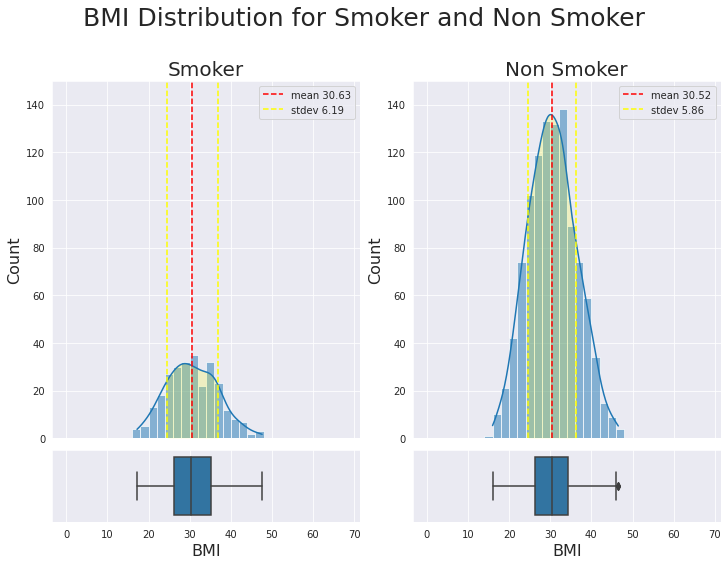

In [153]:
# prepare the data, clean from outlier
smoker_bmi_data = data_source[data_source["smoker"]=="yes"]['bmi']
non_smoker_bmi_data = data_source[data_source["smoker"]=="no"]['bmi']
smoker_bmi_outlier = boxplot_stats(smoker_bmi_data).pop(0)['fliers']
non_smoker_bmi_outlier = boxplot_stats(non_smoker_bmi_data).pop(0)['fliers']
smoker_bmi_data = smoker_bmi_data[~smoker_bmi_data.isin(smoker_bmi_outlier)]
non_smoker_bmi_data = non_smoker_bmi_data[~non_smoker_bmi_data.isin(non_smoker_bmi_outlier)]

# calculate the central tendencies
smoker_bmi_mean = smoker_bmi_data.mean()
smoker_bmi_std = smoker_bmi_data.std()
non_smoker_bmi_mean = non_smoker_bmi_data.mean()
non_smoker_bmi_std = non_smoker_bmi_data.std()

# create figure and axes to plot
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,7), constrained_layout=True, gridspec_kw={'height_ratios':[5,1]},
                      sharex=True)

# set the grid theme
sns.set_style("darkgrid")

# create distribution plot for smoker
sns.histplot(data=smoker_bmi_data, ax=ax[0][0], bins=np.arange(0,70,2), kde=True)
sns.boxplot(x=smoker_bmi_data, ax=ax[1][0])

ax[0][0].axvline(x=smoker_bmi_mean, color="red", linestyle='--', label=f"mean {smoker_bmi_mean:.2f}")
ax[0][0].axvline(x=smoker_bmi_mean+smoker_bmi_std, color="yellow", linestyle='--', label=f"stdev {smoker_bmi_std:.2f}")
ax[0][0].axvline(x=smoker_bmi_mean-smoker_bmi_std, color="yellow", linestyle='--')
kde_x_0, kde_y_0 = ax[0][0].lines[0].get_data()
ax[0][0].fill_between(kde_x_0, kde_y_0, where=(kde_x_0 > smoker_bmi_mean-smoker_bmi_std)
                     & (kde_x_0 < smoker_bmi_mean+smoker_bmi_std), color='yellow', alpha=0.2)
ax[0][0].set_title("Smoker", fontsize=20)
ax[1][0].set_xlabel("BMI", fontsize=16)
ax[0][0].set_ylabel("Count", fontsize=16)
ax[0][0].set_ylim([0,150])
ax[0][0].legend()

# create distribution plot for non smoker
sns.histplot(data=non_smoker_bmi_data, ax=ax[0][1], bins=np.arange(0,70,2), kde=True)
sns.boxplot(x=non_smoker_bmi_data, ax=ax[1][1])
ax[0][1].axvline(x=non_smoker_bmi_mean, color="red", linestyle='--', label=f"mean {non_smoker_bmi_mean:.2f}")
ax[0][1].axvline(x=non_smoker_bmi_mean+non_smoker_bmi_std, color="yellow", linestyle='--', label=f"stdev {non_smoker_bmi_std:.2f}")
ax[0][1].axvline(x=non_smoker_bmi_mean-non_smoker_bmi_std, color="yellow", linestyle='--')
kde_x_1, kde_y_1 = ax[0][1].lines[0].get_data()
ax[0][1].fill_between(kde_x_1, kde_y_1, where=(kde_x_1 > non_smoker_bmi_mean-non_smoker_bmi_std)
                     & (kde_x_1 < non_smoker_bmi_mean+non_smoker_bmi_std), color='yellow', alpha=0.2)
ax[0][1].set_title("Non Smoker", fontsize=20)
ax[1][1].set_xlabel("BMI", fontsize=16)
ax[0][1].set_ylabel("Count", fontsize=16)
ax[0][1].set_ylim([0,150])
ax[0][1].legend()

# show the plot
plt.suptitle("BMI Distribution for Smoker and Non Smoker", size=25, y=1.1)
plt.show()

__Note :__
- After separated by smoker category, the BMI distribution of smoker and non-smoker still forming an acceptable bell shape curve. Hence we are able to use **average** and **standard deviation** for the central tendencies measurement.
- Average BMI of smoker and non-Smoker slightly different, **smoker** has **higher** average BMI at **30.63** while **non smoker** has average BMI **30.52**.
- Standar deviation of **smoker** is **slightly higher** than **non smoker**, with value **6.19 compare to 5.86**.
- We can say that **BMI smoker lies at 24.44 - 36.82**, and **BMI of non smoker lies at 24.66 - 36.38**. BMI of Smoker is slightly **more variative** than BMI of non-smoker.

#### 3. BMI Distribution Data separated by Sex

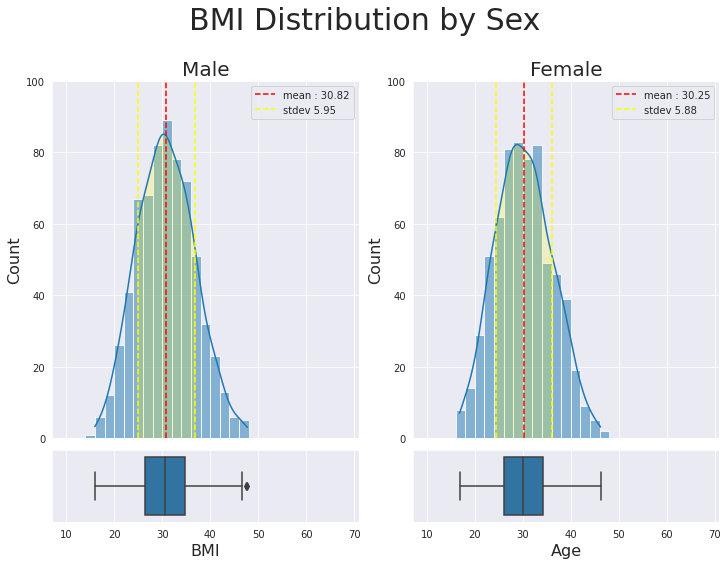

In [155]:
# prepare the data, clean from outlier
male_bmi_data = data_source[data_source["sex"]=="male"]['bmi']
female_bmi_data = data_source[data_source["sex"]=="female"]['bmi']
male_bmi_outlier = boxplot_stats(male_bmi_data).pop(0)['fliers']
female_bmi_outlier = boxplot_stats(female_bmi_data).pop(0)['fliers']
male_bmi_data = male_bmi_data[~male_bmi_data.isin(male_bmi_outlier)]
female_bmi_data = female_bmi_data[~female_bmi_data.isin(female_bmi_outlier)]

# calculate the central tendency 
male_bmi_mean = male_bmi_data.mean()
male_bmi_std = male_bmi_data.std()
female_bmi_mean = female_bmi_data.mean()
female_bmi_std = female_bmi_data.std()

# create figure and axes for plot data
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,7), constrained_layout=True, gridspec_kw={'height_ratios':[5,1]},
                      sharex=True)

# set grid theme
sns.set_style("darkgrid")

# create male distribution plot
sns.histplot(data=male_bmi_data, ax=ax[0][0], bins=np.arange(10,70,2), kde=True) 
sns.boxplot(x=male_bmi_data, ax=ax[1][0])
ax[0][0].axvline(x=male_bmi_mean, color="red", linestyle="--", label=f"mean : {male_bmi_mean:.2f}")
ax[0][0].axvline(x=male_bmi_mean+male_bmi_std, color="yellow", linestyle="--", label=f"stdev {male_bmi_std:.2f}")
ax[0][0].axvline(x=male_bmi_mean-male_bmi_std, color="yellow", linestyle="--")
kde_x_0, kde_y_0 = ax[0][0].lines[0].get_data()
ax[0][0].fill_between(kde_x_0, kde_y_0, where=(kde_x_0 > male_bmi_mean-male_bmi_std)
                     & (kde_x_0 < male_bmi_mean+male_bmi_std), color='yellow', alpha=0.2)
ax[0][0].set_title("Male", fontsize=20)
ax[1][0].set_xlabel("BMI", fontsize=16)
ax[0][0].set_ylabel("Count", fontsize=16)
ax[0][0].set_ylim([0,100])
ax[0][0].legend()

# create female distribution plot
sns.histplot(data=female_bmi_data, ax=ax[0][1], bins=np.arange(10,70,2), kde=True)
sns.boxplot(x=female_bmi_data, ax=ax[1][1])
ax[0][1].axvline(x=female_bmi_mean, color="red", linestyle="--", label=f"mean : {female_bmi_mean:.2f}")
ax[0][1].axvline(x=female_bmi_mean+female_bmi_std, color="yellow", linestyle="--", label=f"stdev {female_bmi_std:.2f}")
ax[0][1].axvline(x=female_bmi_mean-female_bmi_std, color="yellow", linestyle="--")
kde_x_1, kde_y_1 = ax[0][1].lines[0].get_data()
ax[0][1].fill_between(kde_x_1, kde_y_1, where=(kde_x_1 > female_bmi_mean-female_bmi_std)
                     & (kde_x_1 < female_bmi_mean+female_bmi_std), color='yellow', alpha=0.2)
ax[0][1].set_title("Female", fontsize=20)
ax[1][1].set_xlabel("Age", fontsize=16)
ax[0][1].set_ylabel("Count", fontsize=16)
ax[0][1].set_ylim([0,100])
ax[0][1].legend()

# show the plot
plt.suptitle("BMI Distribution by Sex", size=30, y=1.1)
plt.show()

__Note :__
- After separated by sex category, the BMI distribution of male and female still forming an acceptable bell shape curve. Hence we are able to use **average** and **standard deviation** for the central tendencies measurement.
- Average BMI of Male and Female is slightly different, **male** has average BMI **30.82** and **female** has average BMI **30.25**
- Standar deviation of male is slight differ than female, **5.95 for male** compare to **5.88 for female**
- We can say that **BMI of male lies at 24.87 - 36.77**, and BMI of **female lies at 24.37 - 36.13**. With BMI of male is slight more variative than female.

#### 4. BMI Distribution Data separated by Smoker and Sex

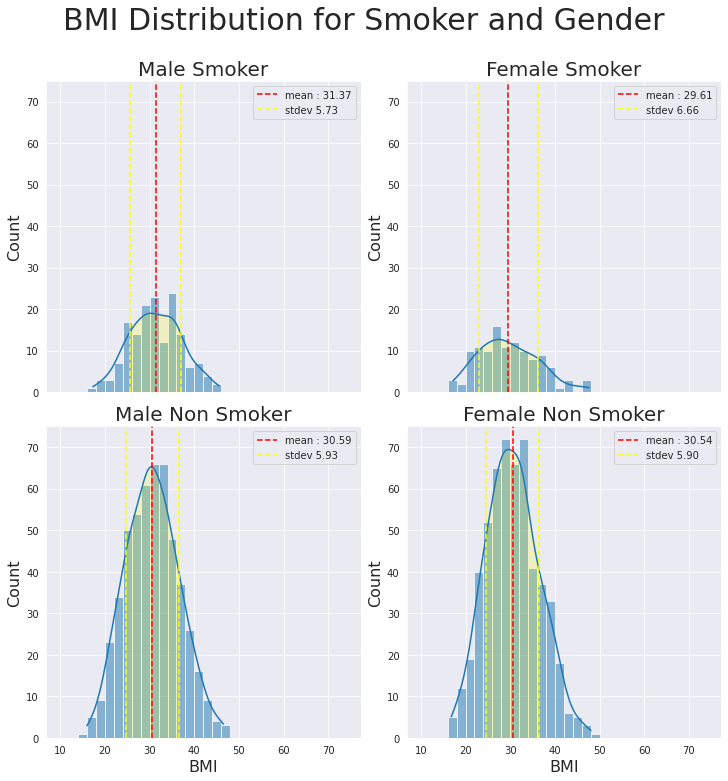

In [8]:
# prepare the data, clean from outlier
smoker_male_bmi = data_source[(data_source["sex"]=="male") & (data_source["smoker"]=="yes")]['bmi']
smoker_female_bmi = data_source[(data_source["sex"]=="female") & (data_source["smoker"]=="yes")]['bmi']
non_smoker_male_bmi = data_source[(data_source["sex"]=="male") & (data_source["smoker"]=="no")]['bmi']
non_smoker_female_bmi = data_source[(data_source["sex"]=="female") & (data_source["smoker"]=="no")]['bmi']
smoker_male_bmi_outlier = boxplot_stats(smoker_male_bmi).pop(0)["fliers"]
smoker_female_bmi_outlier = boxplot_stats(smoker_female_bmi).pop(0)["fliers"]
non_smoker_male_bmi_outlier = boxplot_stats(non_smoker_male_bmi).pop(0)["fliers"]
non_smoker_female_bmi_outlier = boxplot_stats(non_smoker_female_bmi).pop(0)["fliers"]
smoker_male_bmi = smoker_male_bmi[~smoker_male_bmi.isin(smoker_male_bmi_outlier)]
smoker_female_bmi = smoker_female_bmi[~smoker_female_bmi.isin(smoker_female_bmi_outlier)]
non_smoker_male_bmi = non_smoker_male_bmi[~non_smoker_male_bmi.isin(non_smoker_male_bmi_outlier)]
non_smoker_female_bmi = non_smoker_female_bmi[~non_smoker_female_bmi.isin(smoker_female_bmi_outlier)]

# calculate the central tendencies
smoker_male_bmi_mean = smoker_male_bmi.mean()
smoker_male_bmi_std = smoker_male_bmi.std()
smoker_female_bmi_mean = smoker_female_bmi.mean()
smoker_female_bmi_std = smoker_female_bmi.std()
non_smoker_male_bmi_mean = non_smoker_male_bmi.mean()
non_smoker_male_bmi_std = non_smoker_male_bmi.std()
non_smoker_female_bmi_mean = non_smoker_female_bmi.mean()
non_smoker_female_bmi_std = non_smoker_female_bmi.std()

# create figure and axes for plot data
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10), constrained_layout=True, sharex=True)

# set grid theme
sns.set_style("darkgrid")

# create smoker male distribution plot
sns.histplot(data=smoker_male_bmi, ax=ax[0][0], bins=np.arange(10,75,2), kde=True)
ax[0][0].set_title("Male Smoker", fontsize=20)
ax[0][0].set_ylabel("Count", fontsize=16)
ax[0][0].set_ylim([0,75])
ax[0][0].axvline(x=smoker_male_bmi_mean, color="red", linestyle="--", label=f"mean : {smoker_male_bmi_mean:.2f}")
ax[0][0].axvline(x=smoker_male_bmi_mean+smoker_male_bmi_std, color="yellow", linestyle="--", label=f"stdev {smoker_male_bmi_std:.2f}")
ax[0][0].axvline(x=smoker_male_bmi_mean-smoker_male_bmi_std, color="yellow", linestyle="--")
kde_x_0, kde_y_0 = ax[0][0].lines[0].get_data()
ax[0][0].fill_between(kde_x_0, kde_y_0, where=(kde_x_0 > smoker_male_bmi_mean-smoker_male_bmi_std)
                     & (kde_x_0 < smoker_male_bmi_mean+smoker_male_bmi_std), color='yellow', alpha=0.2)
ax[0][0].legend()

# create smoker female distribution plot
sns.histplot(data=smoker_female_bmi, ax=ax[0][1], bins=np.arange(10,75,2), kde=True)
ax[0][1].set_title("Female Smoker", fontsize=20)
ax[0][1].set_ylabel("Count", fontsize=16)
ax[0][1].set_ylim([0,75])
ax[0][1].axvline(x=smoker_female_bmi_mean, color="red", linestyle="--", label=f"mean : {smoker_female_bmi_mean:.2f}")
ax[0][1].axvline(x=smoker_female_bmi_mean+smoker_female_bmi_std, color="yellow", linestyle="--", label=f"stdev {smoker_female_bmi_std:.2f}")
ax[0][1].axvline(x=smoker_female_bmi_mean-smoker_female_bmi_std, color="yellow", linestyle="--")
kde_x_1, kde_y_1 = ax[0][1].lines[0].get_data()
ax[0][1].fill_between(kde_x_1, kde_y_1, where=(kde_x_1 > smoker_female_bmi_mean-smoker_female_bmi_std)
                     & (kde_x_1 < smoker_female_bmi_mean+smoker_female_bmi_std), color='yellow', alpha=0.2)
ax[0][1].legend()

# create non smoker male distribution plot
sns.histplot(data=non_smoker_male_bmi, ax=ax[1][0], bins=np.arange(10,75,2), kde=True)
ax[1][0].set_title("Male Non Smoker", fontsize=20)
ax[1][0].set_ylabel("Count", fontsize=16)
ax[1][0].set_xlabel("BMI", fontsize=16)
ax[1][0].set_ylim([0,75])
ax[1][0].axvline(x=non_smoker_male_bmi_mean, color="red", linestyle="--", label=f"mean : {non_smoker_male_bmi_mean:.2f}")
ax[1][0].axvline(x=non_smoker_male_bmi_mean+non_smoker_male_bmi_std, color="yellow", linestyle="--", label=f"stdev {non_smoker_male_bmi_std:.2f}")
ax[1][0].axvline(x=non_smoker_male_bmi_mean-non_smoker_male_bmi_std, color="yellow", linestyle="--")
kde_x_2, kde_y_2 = ax[1][0].lines[0].get_data()
ax[1][0].fill_between(kde_x_2, kde_y_2, where=(kde_x_2>non_smoker_male_bmi_mean-non_smoker_male_bmi_std)
                   & (kde_x_2<non_smoker_male_bmi_mean+non_smoker_male_bmi_std),
                   color='yellow', alpha=0.2)
ax[1][0].legend()

# create smoker female distribution plot
sns.histplot(data=non_smoker_female_bmi, ax=ax[1][1], bins=np.arange(10,75,2), kde=True)
ax[1][1].set_title("Female Non Smoker", fontsize=20)
ax[1][1].set_ylabel("Count", fontsize=16)
ax[1][1].set_xlabel("BMI", fontsize=16)
ax[1][1].set_ylim([0,75])
ax[1][1].axvline(x=non_smoker_female_bmi_mean, color="red", linestyle="--", label=f"mean : {non_smoker_female_bmi_mean:.2f}")
ax[1][1].axvline(x=non_smoker_female_bmi_mean+non_smoker_female_bmi_std, color="yellow", linestyle="--", label=f"stdev {non_smoker_female_bmi_std:.2f}")
ax[1][1].axvline(x=non_smoker_female_bmi_mean-non_smoker_female_bmi_std, color="yellow", linestyle="--")
kde_x_3, kde_y_3 = ax[1][1].lines[0].get_data()
ax[1][1].fill_between(kde_x_3, kde_y_3, where=(kde_x_3>non_smoker_female_bmi_mean-non_smoker_female_bmi_std)
                   & (kde_x_3<non_smoker_female_bmi_mean+non_smoker_female_bmi_std),
                    color='yellow', alpha=0.2)
ax[1][1].legend()

# show the plot
plt.suptitle("BMI Distribution for Smoker and Gender", size=30, y=1.07)
plt.show()

__Note :__
- After separated by sex and smoke category, the BMI distribution of the data is still forming an acceptable bell shape curve. Hence we are able to use **average** and **standard deviation** for the central tendencies measurement.
- Male smoker BMI average is higher than male non smoker BMI average, **31.537 compare to 30.59**. Otherwise, female smoker average BMI is smaller than female non smoker average BMI, **29,61 compare to 30,54**. 
- Male smoker BMI value is around : **25,64 - 37.1**
- Male non smoker BMI value is around : **24.66 - 36.52**
- Female smoker BMI value is around : **22.95 - 36.27**
- Female non smoker BMI value is around : **24.64 - 36.44**
- I think there are not much different in BMI distribution after separated by sex and smoker category. the interesting part is the fact that the **average insurance user is overweight and obesse**. lets se the barplot which explain about the BMI category

![alt text](https://www.cdc.gov/healthyweight/images/assessing/bmi-adult-fb-600x315.jpg?_=07167)

source : [cdc.gov](https://www.cdc.gov/healthyweight/images/assessing/bmi-adult-fb-600x315.jpg?_=07167)

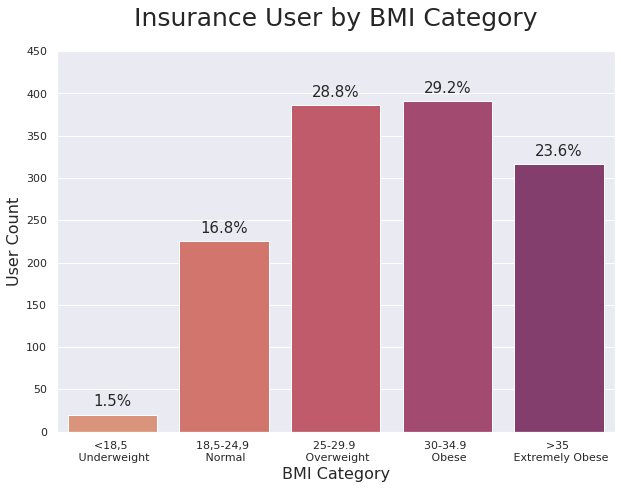

In [71]:
fig, ax = plt.subplots(figsize=(10,7))

newBins = [min(data_source['bmi']), 18.5, 25, 30, 35, max(data_source['bmi'])]
hist, _ = np.histogram(data_source['bmi'], bins=newBins)
palette = sns.color_palette("flare")
sns.barplot(x=list(range(len(hist))), y=hist, palette=palette)
ax.set_xticklabels(["<18,5 \n Underweight","18,5-24,9 \n Normal","25-29.9 \n Overweight",
                    "30-34.9 \n Obese",">35 \n Extremely Obese"])
ax.set_xlabel("BMI Category", fontsize=16)
ax.set_ylabel("User Count", fontsize=16)
ax.set_title("Insurance User by BMI Category", fontsize=25, y=1.05)
ax.set_ylim([0,450])
for i in ax.patches:
    value = '{:.1f}%'.format(100*i.get_height()/sum(hist))
    x = i.get_x() + i.get_width()/2
    y = i.get_height() + 10
    ax.annotate(value, (x,y), ha='center', fontsize=15)
plt.show()

__Note :__
- from this graph we know that the insurance user mostly comprises of overweight - Extremely obese person. Then it is not a surprise if the average BMI value of insurance user is __overweight__

__Summary__
- Overall average BMI of insurance user is **30.54** with standard deviation **5.92**.
- BMI user value is around **24.62-36.46**, i think this is very variative, from the **normal category till extremely obese**
- Smoker and Sex variable **not really contribute to BMI central tendencies**. There are not much different after BMI data was separated by smoke and sex category
- Most of insurance user have not **normal BMI**. **81,7%** insurance user are overweight till extremely obese

__Answering Question__<br>
<br>
**1. BMI average from smoker people?** : From the BMI analysis I found that the average BMI of smoker people is **30.71**, obese<br>
**2. Which BMI is higher male or female?** : From the BMI analysis I found that 
**male has higher BMI than female**, **30.94 compare to 30.38**. But this difference is very small and it state that male and female average BMI is **obese**<br>
**3. Which BMI is higher smoker or non smoker?** : From the BMI analysis I found that smoker BMI is higher than non smoker BMI, 30.71 compare to 30.65. But this difference is very small and it state that smoker and non smoker average BMI is **obese**

___
### Analysis on Charges

#### 1. Charges Distribution Data

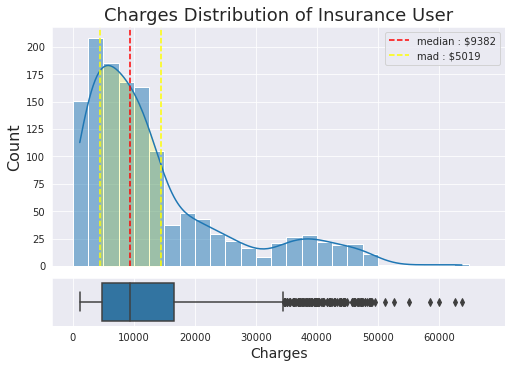

In [9]:
# create figure and axes for plot data
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(7,5), constrained_layout=True, gridspec_kw={'height_ratios':[5,1]},
                      sharex=True)

# set the grid theme
sns.set_style("darkgrid")

# calculate central tendencies
median = data_source.charges.median()
mad = abs(data_source["charges"] - data_source.charges.median()).median()

# plot the historgram
sns.histplot(data=data_source, x="charges", bins=np.arange(0,70000,2500), ax=ax[0], kde=True)
ax[0].set_title("Charges Distribution of Insurance User", fontsize=18, y=1)

ax[0].axvline(x=median, color="red", linestyle="--", label=f"median : ${median:.0f}")
ax[0].axvline(x=median+mad, color="yellow", linestyle="--", label=f"mad : ${mad:.0f}")
ax[0].axvline(x=median-mad, color="yellow", linestyle="--")
kde_x_0, kde_y_0 = ax[0].lines[0].get_data()
ax[0].fill_between(kde_x_0, kde_y_0, where=(kde_x_0 > median-mad)
                     & (kde_x_0 < median+mad), color='yellow', alpha=0.2)
ax[0].set_xlabel("Charges", fontsize=16)
ax[0].set_ylabel("Count", fontsize=16)
ax[0].legend()

# plot the boxplot
sns.boxplot(data=data_source, x="charges", ax=ax[1])
ax[1].set_xlabel("Charges", fontsize=14)
xaxis_value = np.arange(0,70000, 10000)
ax[1].set_xticks(xaxis_value)

# show the plot
plt.show()

__Note :__
- charge distribution of insurance user skewed to the left, so it is not good if we use **average** and **standard deviation** to measure central tendencies. Otherwise we could use **median** and **median absolute deviation** to measure the central tendencies
- median of the insurance charge is **\\$9382** , with MAD **\\$5019**.
- insurance charge value is around **\\$4363 - \\$14401**.

#### 2. Charge Distribution Data Separated by Smoker

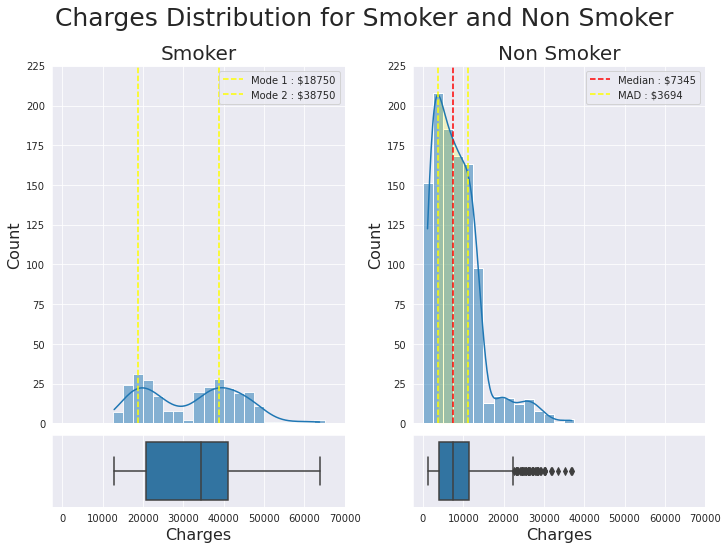

In [54]:
# separate the smoker and non smoker data
smoker_data = data_source[data_source["smoker"]=="yes"]
non_smoker_data = data_source[data_source["smoker"]=="no"]


# calculate the central tendencies
non_smoker_charges_median = non_smoker_data.charges.median()
non_smoker_charges_mad = abs(non_smoker_data["charges"] - non_smoker_data["charges"].median()).median()

# create the figure and axes for plot
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,7), constrained_layout=True, gridspec_kw={'height_ratios':[5,1]},
                      sharex=True)

# set the grid theme
sns.set_style("darkgrid")

# create smoker distribution plot
sns.histplot(data=smoker_data, x="charges", ax=ax[0][0], bins=np.arange(0,70000,2500), kde=True)
sns.boxplot(data=smoker_data, x="charges", ax=ax[1][0])
ax[0][0].axvline(x=18750, color="yellow", linestyle='--', label=f"Mode 1 : $18750")
ax[0][0].axvline(x=38750, color="yellow", linestyle='--', label=f"Mode 2 : $38750")
ax[0][0].set_xlim([10000,70000])
ax[0][0].set_ylim([0,225])
ax[0][0].legend()
ax[0][0].set_title("Smoker", size=20)
ax[1][0].set_xlabel("Charges", fontsize=16)
ax[0][0].set_ylabel("Count", fontsize=16)

# create non smoker distribution plot
sns.histplot(data=non_smoker_data, x="charges", ax=ax[0][1], bins=np.arange(0,70000,2500), kde=True)
sns.boxplot(data=non_smoker_data, x="charges", ax=ax[1][1])
ax[0][1].set_title("Non Smoker", size=20)
ax[0][1].axvline(x=non_smoker_charges_median, color="red", linestyle='--', label=f"Median : ${non_smoker_charges_median:.0f}")
ax[0][1].axvline(x=non_smoker_charges_median+non_smoker_charges_mad, color="yellow", linestyle='--', label=f"MAD : ${non_smoker_charges_mad:.0f}")
ax[0][1].axvline(x=non_smoker_charges_median-non_smoker_charges_mad, color="yellow", linestyle='--')
kde_x_0, kde_y_0 = ax[0][1].lines[0].get_data()
ax[0][1].fill_between(kde_x_0, kde_y_0, where=(kde_x_0 > non_smoker_charges_median-non_smoker_charges_mad)
                     & (kde_x_0 < non_smoker_charges_median+non_smoker_charges_mad), color='yellow', alpha=0.2)
ax[0][1].set_xlim([-2500,70000])
ax[0][1].set_ylim([0,225])
ax[0][1].legend()
ax[1][1].set_xlabel("Charges", fontsize=16)
ax[0][1].set_ylabel("Count", fontsize=16)

# show the plot
plt.suptitle("Charges Distribution for Smoker and Non Smoker", size=25, y=1.07)
plt.show()

__Note :__
- smoker charge distribution is completely different with non smoker charge distribution. smoker charge distribution shaping **bimodal distribution**, hence I would use **mode** to measure the central tendencies. Otherwise non smoker charge distribution is **skewed to the left**, hence I would use **median and mad** as central tendency measurement.
- smoker charge distribution shaping bimodal distribution with first mode at **\\$18750** and second mode at **\\$38750**.
- non smoker median charge is **\\$7345** with median absolute deviation **\\$3694**. Hence I could say that for non smoker the charge price is around **\\$3651-\\$11039**
- comparing charge price between smoker and non smoker, non smoker charges indeed **cheaper** than smoker charges

#### 3. Charge Distribution Separated by Sex

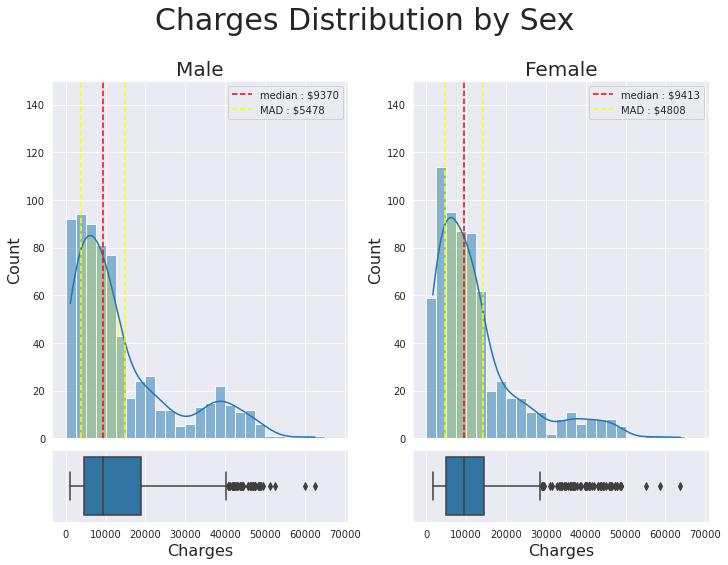

In [21]:
# separate the male and female data
male_data = data_source[data_source["sex"]=="male"]
female_data = data_source[data_source["sex"]=="female"]

# calculate the central tendency
male_charges_median = male_data['charges'].median()
male_charges_mad = abs(male_data['charges'] - male_data['charges'].median()).median()
female_charges_median = female_data['charges'].median()
female_charges_mad = abs(female_data['charges'] - female_data['charges'].median()).median()

# create figure and axes for plot data
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,7), constrained_layout=True, gridspec_kw={'height_ratios':[5,1]},
                      sharex=True)

# set grid theme
sns.set_style("darkgrid")

# create male distribution plot
sns.histplot(data=male_data, x="charges", ax=ax[0][0], bins=np.arange(0,70000,2500), kde=True) 
sns.boxplot(data=male_data, x="charges", ax=ax[1][0])
ax[0][0].set_title("Male", fontsize=20)
ax[1][0].set_xlabel("Charges", fontsize=16)
ax[0][0].set_ylabel("Count", fontsize=16)
ax[0][0].set_ylim([0,150])
ax[0][0].axvline(x=male_charges_median, color="red", linestyle="--", label=f"median : ${male_charges_median:.0f}")
ax[0][0].axvline(x=male_charges_median+male_charges_mad, color="yellow", linestyle='--', label=f"MAD : ${male_charges_mad:.0f}")
ax[0][0].axvline(x=male_charges_median-male_charges_mad, color="yellow", linestyle='--')
kde_x_0, kde_y_0 = ax[0][0].lines[0].get_data()
ax[0][0].fill_between(kde_x_0, kde_y_0, where=(kde_x_0 > male_charges_median-male_charges_mad)
                     & (kde_x_0 < male_charges_median+male_charges_mad), color='yellow', alpha=0.2)
ax[0][0].legend()

# create female distribution plot
sns.histplot(data=female_data, x="charges", ax=ax[0][1], bins=np.arange(0,70000,2500), kde=True)
sns.boxplot(data=female_data, x="charges", ax=ax[1][1])
ax[0][1].set_title("Female", fontsize=20)
ax[1][1].set_xlabel("Charges", fontsize=16)
ax[0][1].set_ylabel("Count", fontsize=16)
ax[0][1].set_ylim([0,150])
ax[0][1].axvline(x=female_charges_median, color="red", linestyle="--", label=f"median : ${female_charges_median:.0f}")
ax[0][1].axvline(x=female_charges_median+female_charges_mad, color="yellow", linestyle='--', label=f"MAD : ${female_charges_mad:.0f}")
ax[0][1].axvline(x=female_charges_median-female_charges_mad, color="yellow", linestyle='--')
kde_x_1, kde_y_1 = ax[0][1].lines[0].get_data()
ax[0][1].fill_between(kde_x_1, kde_y_1, where=(kde_x_1 > female_charges_median-female_charges_mad)
                     & (kde_x_1 < female_charges_median+female_charges_mad), color='yellow', alpha=0.2)
ax[0][1].legend()

# show the plot
plt.suptitle("Charges Distribution by Sex", size=30, y=1.1)
plt.show()

__Note :__
- After separated by sex category, the charge distribution still shaping left skewed distribution. Hence I would use **median and MAD** as central tendencies measurement
- Male insurance charge median is **\\$9370** with mad **\\$5478**.
- Female insurance charge median is **\\$9413** with mad **\\$4808**.
- Comparing from the central tendencies female charge is **more expensive** than male charges. Also female charges **less variative** than male charges

#### 4. Charge Distribution by Sex and Smoker

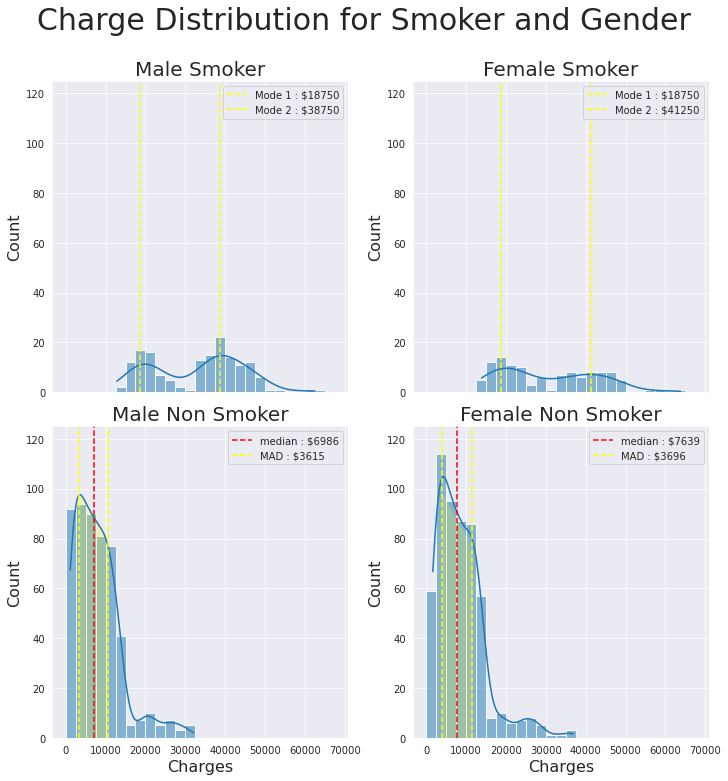

In [15]:
# separate the male and female data
smoker_male_data = data_source[(data_source["sex"]=="male") & (data_source["smoker"]=="yes")]
smoker_female_data = data_source[(data_source["sex"]=="female") & (data_source["smoker"]=="yes")]
non_smoker_male_data = data_source[(data_source["sex"]=="male") & (data_source["smoker"]=="no")]
non_smoker_female_data = data_source[(data_source["sex"]=="female") & (data_source["smoker"]=="no")]

# calculate central tendencies
non_smoker_male_charges_median = non_smoker_male_data["charges"].median()
non_smoker_male_charges_mad = abs(non_smoker_male_data["charges"]-non_smoker_male_data["charges"].median()).median()
non_smoker_female_charges_median = non_smoker_female_data["charges"].median()
non_smoker_female_charges_mad = abs(non_smoker_female_data["charges"]-non_smoker_female_data["charges"].median()).median()

# create figure and axes for plot data
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10), constrained_layout=True, sharex=True)

# set grid theme
sns.set_style("darkgrid")

# create smoker male distribution plot
sns.histplot(data=smoker_male_data, x="charges", ax=ax[0][0], bins=np.arange(0,70000,2500), kde=True)
ax[0][0].set_title("Male Smoker", fontsize=20)
ax[0][0].set_ylabel("Count", fontsize=16)
ax[0][0].set_ylim([0,125])
ax[0][0].axvline(x=18750, color="yellow", linestyle='--', label=f"Mode 1 : $18750")
ax[0][0].axvline(x=38750, color="yellow", linestyle='--', label=f"Mode 2 : $38750")
ax[0][0].legend()

# create smoker female distribution plot
sns.histplot(data=smoker_female_data, x="charges", ax=ax[0][1], bins=np.arange(0,70000,2500), kde=True)
ax[0][1].set_title("Female Smoker", fontsize=20)
ax[0][1].set_ylabel("Count", fontsize=16)
ax[0][1].set_ylim([0,125])
ax[0][1].axvline(x=18750, color="yellow", linestyle='--', label=f"Mode 1 : $18750")
ax[0][1].axvline(x=41250, color="yellow", linestyle='--', label=f"Mode 2 : $41250")
ax[0][1].legend()

# create non smoker male distribution plot
sns.histplot(data=non_smoker_male_data, x="charges", ax=ax[1][0], bins=np.arange(0,70000,2500), kde=True)
ax[1][0].set_title("Male Non Smoker", fontsize=20)
ax[1][0].set_ylabel("Count", fontsize=16)
ax[1][0].set_xlabel("Charges", fontsize=16)
ax[1][0].set_ylim([0,125])
ax[1][0].axvline(x=non_smoker_male_charges_median, color="red", linestyle="--", label=f"median : ${non_smoker_male_charges_median:.0f}")
ax[1][0].axvline(x=non_smoker_male_charges_median+non_smoker_male_charges_mad, color="yellow", linestyle='--', label=f"MAD : ${non_smoker_male_charges_mad:.0f}")
ax[1][0].axvline(x=non_smoker_male_charges_median-non_smoker_male_charges_mad, color="yellow", linestyle='--')
kde_x_0, kde_y_0 = ax[1][0].lines[0].get_data()
ax[1][0].fill_between(kde_x_0, kde_y_0, where=(kde_x_0 > non_smoker_male_charges_median-non_smoker_male_charges_mad)
                     & (kde_x_0 < non_smoker_male_charges_median+non_smoker_male_charges_mad), color='yellow', alpha=0.2)
ax[1][0].legend()

# create smoker female distribution plot
sns.histplot(data=non_smoker_female_data, x="charges", ax=ax[1][1], bins=np.arange(0,70000,2500), kde=True)
ax[1][1].set_title("Female Non Smoker", fontsize=20)
ax[1][1].set_ylabel("Count", fontsize=16)
ax[1][1].set_xlabel("Charges", fontsize=16)
ax[1][1].set_ylim([0,125])
ax[1][1].axvline(x=non_smoker_female_charges_median, color="red", linestyle="--", label=f"median : ${non_smoker_female_data.charges.median():.0f}")
ax[1][1].axvline(x=non_smoker_female_charges_median+non_smoker_female_charges_mad, color="yellow", linestyle='--',
                label=f"MAD : ${non_smoker_female_charges_mad:.0f}")
ax[1][1].axvline(x=non_smoker_female_charges_median-non_smoker_female_charges_mad, color="yellow", linestyle='--')
kde_x_1, kde_y_1 = ax[1][1].lines[0].get_data()
ax[1][1].fill_between(kde_x_0, kde_y_0, where=(kde_x_0 > non_smoker_female_charges_median-non_smoker_female_charges_mad)
                     & (kde_x_0 < non_smoker_female_charges_median+non_smoker_female_charges_mad), color='yellow', alpha=0.2)
ax[1][1].legend()

# show the plot
plt.suptitle("Charge Distribution for Smoker and Gender", size=30, y=1.07)
plt.show()

__Note :__
- After separated by sex and smoker category, smoker distribution still shaping **bimodal distribution**, hence I would use **mode** as central tendency. Sex distribution is still shaping **left skewed distribution**, hence I would use **median and mad** as central tendency.
- Male non smoker charges value is around **\\$3371-\\$10601**. Female non smoker charges value is around **\\$3943-\\$11335**.
- Male smoker charge is cheaper than female smoker charge, with the first mode are same at **\\$18750**, because the female smoker second mode is more expensive than male, **\\$41250** compare to **\\$38750**.
- By using median I could say that male non smoker charges is cheaper than female non smoker charges, **\\$6986** compare to **\\$7639**. Also male non smoker charge is less variative than female non smoker charges, comparing by respective MAD, **\\$3615** to **\\$3696**.

#### 5. Overweight Charge Distribution separated by Smoker

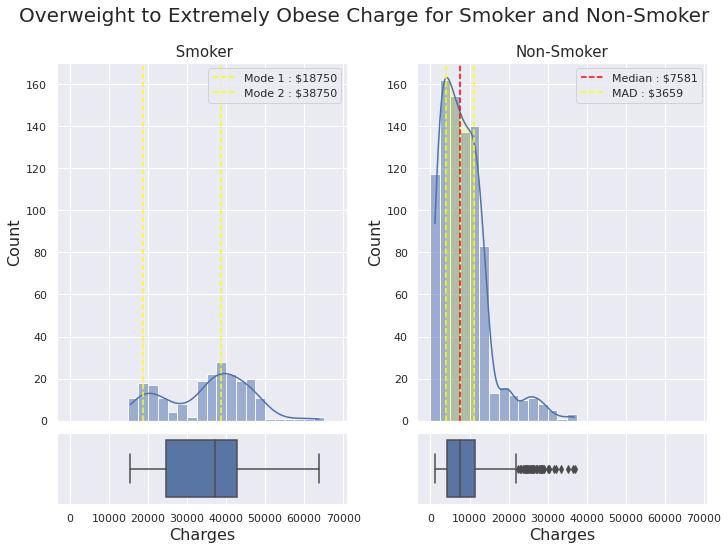

In [17]:
# prepare the data
smoker_overweight_bmi_charges = data_source[(data_source["bmi"] > 25) & (data_source["smoker"]=="yes")]
non_smoker_overweight_bmi_charges = data_source[(data_source["bmi"] > 25) & (data_source["smoker"]=="no")]

# calculate central tendency
non_smoker_overweight_bmi_charges_median = non_smoker_overweight_bmi_charges["charges"].median()
non_smoker_overweight_bmi_charges_mad = abs(non_smoker_overweight_bmi_charges["charges"]-non_smoker_overweight_bmi_charges["charges"].median()).median()

# create figure and axes for ploting data
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,7), constrained_layout=True, gridspec_kw={'height_ratios':[5,1]},
                      sharex=True)

# plot data for overweight smoker
sns.set(style="darkgrid")
sns.histplot(data=smoker_overweight_bmi_charges, x="charges", ax=ax[0][0], kde=True, bins=np.arange(0,70000,2500))
sns.boxplot(data=smoker_overweight_bmi_charges, x="charges", ax=ax[1][0])
ax[0][0].axvline(x=18750, color="yellow", linestyle='--', label=f"Mode 1 : $18750")
ax[0][0].axvline(x=38750, color="yellow", linestyle='--', label=f"Mode 2 : $38750")
ax[0][0].set_ylim([0,170])
ax[0][0].legend()
ax[0][0].set_title(" Smoker", fontsize=15)
ax[0][0].set_ylabel("Count", fontsize=16)
ax[1][0].set_xlabel("Charges", fontsize=16)

# plot data for overweight non smoker
sns.histplot(data=non_smoker_overweight_bmi_charges, x="charges", ax=ax[0][1], kde=True, bins=np.arange(0,70000,2500))
sns.boxplot(data=non_smoker_overweight_bmi_charges, x="charges", ax=ax[1][1])
ax[0][1].axvline(x=non_smoker_overweight_bmi_charges_median,
                color="red", linestyle='--', label=f"Median : ${non_smoker_overweight_bmi_charges_median:.0f}")
ax[0][1].axvline(x=non_smoker_overweight_bmi_charges_median+non_smoker_overweight_bmi_charges_mad,
                color="yellow", linestyle='--', label=f"MAD : ${non_smoker_overweight_bmi_charges_mad:.0f}")
ax[0][1].axvline(x=non_smoker_overweight_bmi_charges_median-non_smoker_overweight_bmi_charges_mad,
                color="yellow", linestyle='--')
kde_x_0, kde_y_0 = ax[0][1].lines[0].get_data()
ax[0][1].fill_between(kde_x_0, kde_y_0, where=(kde_x_0 >non_smoker_overweight_bmi_charges_median-non_smoker_overweight_bmi_charges_mad)
                     & (kde_x_0 < non_smoker_overweight_bmi_charges_median+non_smoker_overweight_bmi_charges_mad),
                      color='yellow', alpha=0.2)
ax[0][1].set_ylim([0,170])
ax[0][1].legend()
ax[0][1].set_title("Non-Smoker", fontsize=15)
ax[0][1].set_ylabel("Count", fontsize=16)
ax[1][1].set_xlabel("Charges", fontsize=16)

# show the plot
plt.suptitle("Overweight to Extremely Obese Charge for Smoker and Non-Smoker", fontsize=20, y=1.07)
plt.show()

__Note__ :
- After we examine overweight people charge distribution. The overweight smoker distribution still shaping bimodal distribution, and overweight non smoker distribution still shaping left skewed distribution. 
- Overweight smoker charge distribution first mode at **\\$18750** and second mode at **\\$38750**.
- Overweight non smoker charge value is around **\\$3922-\\$11240**.
- For overall i think, despite of overweight people, smoker insurance chare is still **more expensive** than non smoker insurance charges.

__Summary__
- Overall insurance charges value is around **\\$4363 - \\$14401**
- Smoker insurance charges are **more expensive** than non smoker insurance charge. Central tendency of smoker insurance charge value is absolutely larger than **\\$18000**, whereas central tendency of non smoker insurance charge is less than **\\$10000**. 
- Female insurance charges is more expensive than male insurance charges, but the difference is not larger than **\\$1000**.

In [61]:
# calculating charge variance of smoker and non smoker
smoker_charge_variance = smoker_data['charges'].var()
non_smoker_charge_variance = non_smoker_data['charges'].var()

print(f"Smoker charges variance is : {smoker_charge_variance}")
print(f"Non Smoker charges variance is : {non_smoker_charge_variance}")

if smoker_charge_variance > non_smoker_charge_variance :
    print("Smoker charge variance is larger")
else :
    print("Non smoker charge variance is larger")

Smoker charges variance is : 133207311.20634921
Non Smoker charges variance is : 35925420.49611172
Smoker charge variance is larger


__Answering Question__<br>
<br>
**1. Is charges variance from smoker and non smoker same?** : Based on variance calculation above, I found that the variance is not same, smoker people has more variance charges than non smoker people <br>
**2. Which one is more expensive, smoker insurance charges or non smoker?** : From the charge analysis I found that smoker insurance charge is more expensive than non smoker insurance charge <br>
**3. Which one is more expensive, smoker insurance charges with BMI > 25 or non smoker insurance charges with BMI > 25?** : From the charge analysis also I found that for people with BMI > 25, smoker insurance charge is more expensive than non smoker insurance charge 

__Summary of Desctiptive Statistic Analysis__

Insurance users come mainly from **productive people**, with age values **ranging** from **25 to 51 years old**, with an **average** value of **39-40 years old**. The unique part, is those productive people have an average value of BMI around **30** which lies in the category of **Obese**. After further analysis, I found that **87,1%** of the insurance user is having BMI from **Overweight to Extremely Obese**. This insurance user also covers people who smoke and don’t smoke. Because of their habits, the insurance charge of those people will vary, the **most expensive group** of insurance user charges comes from those who **smoke**. The insurance charges for smokers are much more expensive than for non-smokers. The charges values for smokers are **larger than \\$18000** while charges for non-smokers are **less than $10000**.

---
## Step 2 : Categoric Variable Analysis (PMF)

### Analysis By Region

#### 1. Insurance User In Every Region

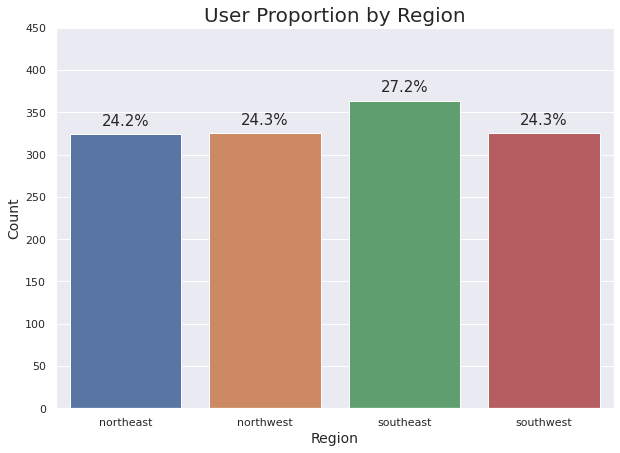

In [19]:
region_user = data_source.groupby("region")['age'].count().reset_index()
region_user.rename(columns={'age':'count'}, inplace=True)

fig, ax = plt.subplots(figsize=(10,7))
sns.set(style="darkgrid")
sns.barplot(data=region_user, x='region', y='count')
ax.set_ylim([0,450])
ax.set_title("User Proportion by Region", fontsize=20, y=1)
ax.set_xlabel("Region", fontsize=14)
ax.set_ylabel("Count", fontsize=14)
for i in ax.patches:
    percentage = '{:.1f}%'.format(100*i.get_height()/sum(region_user["count"]))
    x = i.get_x() + i.get_width()/2
    y = i.get_height()+10
    ax.annotate(percentage, (x,y), ha='center', fontsize=15)
plt.show()

__Note :__
- **north west**, **south west**, and **north east** has the same proportion of user, bar plot showed that the value is 24.2% - 24.3%, where as the **south east** has the largest proportion **27.2%**

#### 2. Smoker Proportion by Region

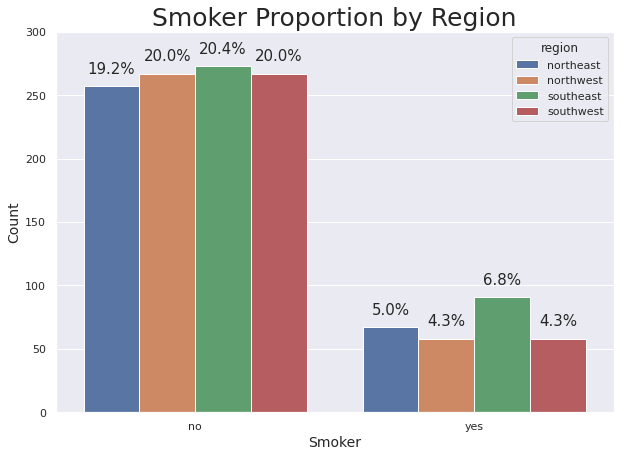

In [21]:
region_smoker = data_source.groupby(["region","smoker"])['age'].count().reset_index()
region_smoker.rename(columns={'age':'count'}, inplace=True)

fig, ax = plt.subplots(figsize=(10,7))
sns.set(style="darkgrid")
sns.barplot(data=region_smoker, x='smoker', hue='region', y='count')
ax.set_ylim([0,300])
ax.set_title("Smoker Proportion by Region", fontsize=25, y=1)
ax.set_xlabel("Smoker", fontsize=14)
ax.set_ylabel("Count", fontsize=14)
for i in ax.patches:
    percentage = '{:.1f}%'.format(100*i.get_height()/sum(region_user["count"]))
    x = i.get_x() + i.get_width()/2
    y = i.get_height()+10
    ax.annotate(percentage, (x,y), ha='center', fontsize=15)
plt.show()

__Note :__
- **Southeast** has largest proportion of smoker compare to another region, whereas **northwest and southwest** has the **same head count of smoker**.
- In **every region** proportion of non smoker is **larger** than proportion of smoker

#### 3. Sex Proportion by Region

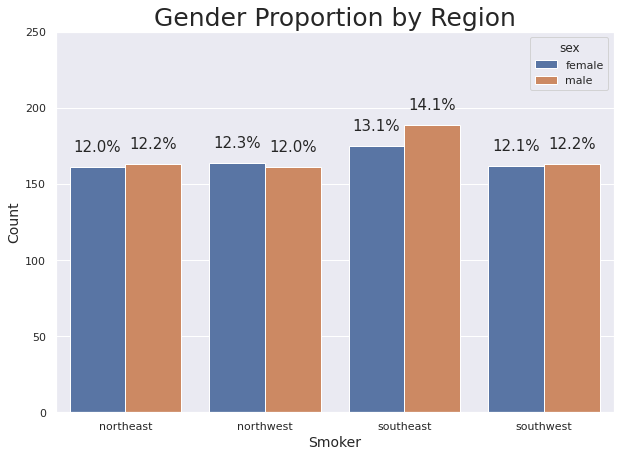

In [20]:
region_smoker = data_source.groupby(["region","sex"])['age'].count().reset_index()
region_smoker.rename(columns={'age':'count'}, inplace=True)

fig, ax = plt.subplots(figsize=(10,7))
sns.set(style="darkgrid")
sns.barplot(data=region_smoker, x='region', hue='sex', y='count')
ax.set_ylim([0,250])
ax.set_title("Gender Proportion by Region", fontsize=25, y=1)
ax.set_xlabel("Smoker", fontsize=14)
ax.set_ylabel("Count", fontsize=14)
for i in ax.patches:
    percentage = '{:.1f}%'.format(100*i.get_height()/sum(region_user["count"]))
    x = i.get_x() + i.get_width()/2
    y = i.get_height()+10
    ax.annotate(percentage, (x,y), ha='center', fontsize=15)
plt.show()

__Note :__
- Every region nearly has __50:50__ female to male ratio, except __southeast__ with a difference in __1%__ of gender proportion.

#### 4. Charges data for every region

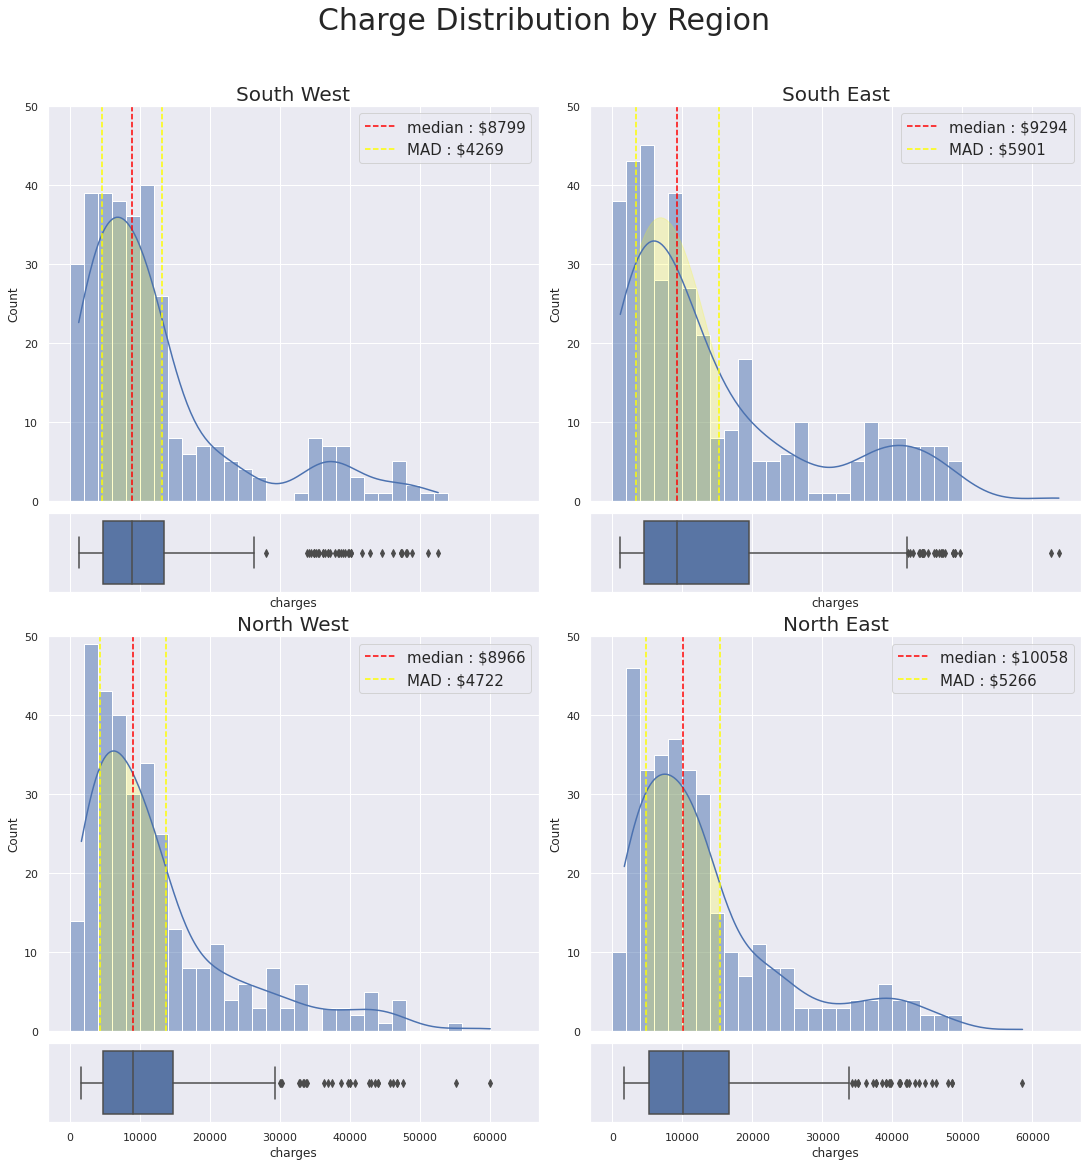

In [92]:
# separate the data by region
southwest_data = data_source[data_source["region"]=="southwest"]
southeast_data = data_source[data_source["region"]=="southeast"]
northwest_data = data_source[data_source["region"]=="northwest"]
northeast_data = data_source[data_source["region"]=="northeast"]

# calculate the central tendency
southwest_data_charges_median = southwest_data["charges"].median()
southwest_data_charges_mad = abs(southwest_data["charges"] - southwest_data["charges"].median()).median()
southeast_data_charges_median = southeast_data["charges"].median()
southeast_data_charges_mad = abs(southeast_data["charges"] - southeast_data["charges"].median()).median()
northwest_data_charges_median = northwest_data["charges"].median()
northwest_data_charges_mad = abs(northwest_data["charges"] - northwest_data["charges"].median()).median()
northeast_data_charges_median = northeast_data["charges"].median()
northeast_data_charges_mad = abs(northeast_data["charges"] - northeast_data["charges"].median()).median()

# create figure and axes for plot data
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(15,15), constrained_layout=True, sharex=True,
                       gridspec_kw={'height_ratios':[5,1,5,1]})

# set axis theme 
sns.set_style('darkgrid')

# create distribution plot for southwest
sns.histplot(data=southwest_data, x="charges", ax=ax[0][0], bins=np.arange(0,60000,2000), kde=True)
sns.boxplot(data=southwest_data, x="charges", ax=ax[1][0])
ax[0][0].set_title("South West", fontsize=20)
ax[0][0].set_ylim([0,50])
ax[0][0].axvline(x=southwest_data_charges_median, color="red", linestyle="--",
                 label=f"median : ${southwest_data_charges_median:.0f}")
ax[0][0].axvline(x=southwest_data_charges_median+southwest_data_charges_mad, color="yellow", linestyle="--",
                 label=f"MAD : ${southwest_data_charges_mad:.0f}")
ax[0][0].axvline(x=southwest_data_charges_median-southwest_data_charges_mad, color="yellow", linestyle="--")
kde_x_0, kde_y_0 = ax[0][0].lines[0].get_data()
ax[0][0].fill_between(kde_x_0, kde_y_0, where=(kde_x_0 > southwest_data_charges_median-southwest_data_charges_mad)
                     & (kde_x_0 < southwest_data_charges_median+southwest_data_charges_mad), color='yellow', alpha=0.2)
ax[0][0].legend(fontsize=15)

# create distribution plot for southeast
sns.histplot(data=southeast_data, x="charges", ax=ax[0][1], bins=np.arange(0,60000,2000), kde=True)
sns.boxplot(data=southeast_data, x="charges", ax=ax[1][1])
ax[0][1].set_title("South East", fontsize=20)
ax[0][1].set_ylim([0,50])
ax[0][1].axvline(x=southeast_data_charges_median, color="red", linestyle="--",
                 label=f"median : ${southeast_data_charges_median:.0f}")
ax[0][1].axvline(x=southeast_data_charges_median+southeast_data_charges_mad, color="yellow", linestyle="--",
                 label=f"MAD : ${southeast_data_charges_mad:.0f}")
ax[0][1].axvline(x=southeast_data_charges_median-southeast_data_charges_mad, color="yellow", linestyle="--")
kde_x_1, kde_y_1 = ax[0][0].lines[0].get_data()
ax[0][1].fill_between(kde_x_1, kde_y_1, where=(kde_x_1 > southeast_data_charges_median-southeast_data_charges_mad)
                     & (kde_x_1 < southeast_data_charges_median+southeast_data_charges_mad), color='yellow', alpha=0.2)
ax[0][1].legend(fontsize=15)

# create distribution plot for northwest
sns.histplot(data=northwest_data, x="charges", ax=ax[2][0], bins=np.arange(0,60000,2000), kde=True)
sns.boxplot(data=northwest_data, x="charges", ax=ax[3][0])
ax[2][0].set_title("North West", fontsize=20)
ax[2][0].set_ylim([0,50])
ax[2][0].axvline(x=northwest_data_charges_median, color="red", linestyle="--",
                 label=f"median : ${northwest_data_charges_median:.0f}")
ax[2][0].axvline(x=northwest_data_charges_median+northwest_data_charges_mad, color="yellow", linestyle="--",
                 label=f"MAD : ${northwest_data_charges_mad:.0f}")
ax[2][0].axvline(x=northwest_data_charges_median-northwest_data_charges_mad, color="yellow", linestyle="--")
kde_x_3, kde_y_3 = ax[2][0].lines[0].get_data()
ax[2][0].fill_between(kde_x_3, kde_y_3, where=(kde_x_3 > northwest_data_charges_median-northwest_data_charges_mad)
                     & (kde_x_3 < northwest_data_charges_median+northwest_data_charges_mad), color='yellow', alpha=0.2)
ax[2][0].legend(fontsize=15)

# create distribution plot for northeast
sns.histplot(data=northeast_data, x="charges", ax=ax[2][1], bins=np.arange(0,60000,2000), kde=True)
sns.boxplot(data=northeast_data, x="charges", ax=ax[3][1])
ax[2][1].set_title("North East", fontsize=20)
ax[2][1].set_ylim([0,50])
ax[2][1].axvline(x=northeast_data_charges_median, color="red", linestyle="--",
                 label=f"median : ${northeast_data_charges_median:.0f}")
ax[2][1].axvline(x=northeast_data_charges_median+northeast_data_charges_mad, color="yellow", linestyle="--",
                 label=f"MAD : ${northeast_data_charges_mad:.0f}")
ax[2][1].axvline(x=northeast_data_charges_median-northeast_data_charges_mad, color="yellow", linestyle="--")
kde_x_4, kde_y_4 = ax[2][1].lines[0].get_data()
ax[2][1].fill_between(kde_x_4, kde_y_4, where=(kde_x_4 > northeast_data_charges_median-northeast_data_charges_mad)
                     & (kde_x_4 < northeast_data_charges_median+northeast_data_charges_mad), color='yellow', alpha=0.2)
ax[2][1].legend(fontsize=15)

# show the plot
plt.suptitle("Charge Distribution by Region", size=30, y=1.07)
plt.show()


__Note :__
- Charge distribution by region showing **all distribution skewed to the left**. So i use **median and MAD** as central tendency
- South West median price is **\\$8799** with MAD **\\$4269**, hence the charges is around **\\$4530-\\$13068**.
- South East median price is **\\$9294** with MAD **\\$5901**, hence the charges is around **\\$3393-\\$15195**.
- North West median price is **\\$8966** with MAD **\\$4722**, hence the charges is around **\\$4244-\\$13688**.
- North East median price is **\\$10058** with MAD **\\$5266**, hence the charges is around **\\$4792-\\$15324**.
- North East becoming the most expensive charges with median **\\$10058**, and south west becoming the most cheap charges with median **\\$8799**. South East become the most variative region to have charges value with MAD **\\$5901**, while south west become the smallest variative region to have charges value with MAD **\\$4269**.

__Summary__
- **South East** is the largest region for this insurance user, the proportion is 27.2%
- **Smoker** proportion is always **larger** than **non smoker** proportion in every region
- **Sex** proportion in every region nearly **50:50**. Means the number of male and female from every region **not differ a lot**

__Answering Question__<br>
<br>
**1. Is every region has same data proportion?** : From the region analysis I found that every region has nearly the same data proportion. South East become dominant with 27.2% of all data <br>
**2. How is the shape of charge distribution in every region?**: From the region analysis I found that every region charge distribution forming positively skewed distribution 

### Analysis by Sex and Smoker  

#### 1. Proportion of Smoker and Non Smoker

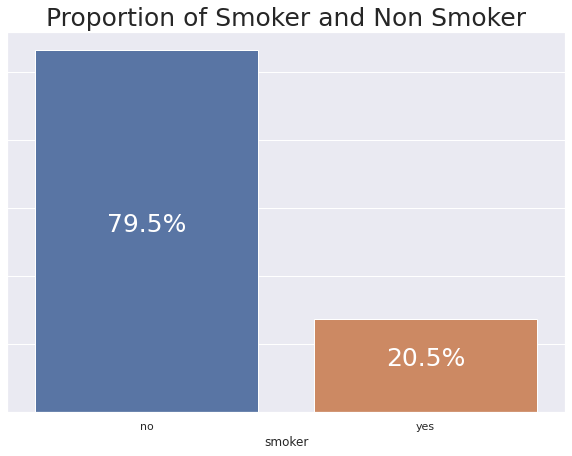

In [176]:
#prepare the data
smoker_proportion = data_source.groupby("smoker")["age"].count().reset_index()
smoker_proportion.rename(columns = {"age":"count"}, inplace=True)

# create figure and axes
fig, ax = plt.subplots(figsize=(10,7))

# create the plot
sns.barplot(data=smoker_proportion, x="smoker", y="count")
ax.set(yticklabels=[])  
ax.set(ylabel=None)
for i in ax.patches:
    percentage = '{:.1f}%'.format(100*i.get_height()/sum(smoker_proportion["count"]))
    x = i.get_x() + i.get_width()/2
    y = i.get_height()/2
    ax.annotate(percentage, (x,y), ha='center', fontsize=25, color="white")
ax.set_title("Proportion of Smoker and Non Smoker", fontsize=25)

# show the plot
plt.show()

__Note__:
- As we know that the proportion of non smoker are larger than smoker. The exact amount of proportion is **79.5%** for non smoker and **20.5%** smoker

#### 2. Proportion of Sex in Smoker

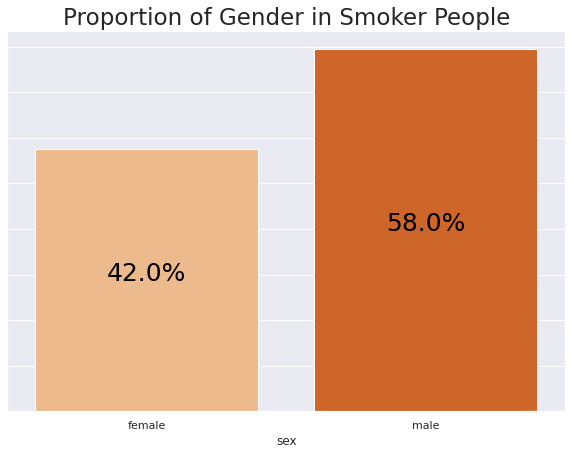

In [24]:
# prepare the data
sex_smoker_proportion = data_source.groupby(["smoker","sex"])["age"].count().reset_index()
sex_smoker_proportion = sex_smoker_proportion[sex_smoker_proportion["smoker"]=="yes"]
sex_smoker_proportion.rename(columns = {"age":"count"}, inplace=True)

# create figure and axes
fig, ax = plt.subplots(figsize=(10,7))

# crate the proportion plot
orange_palette = sns.color_palette(palette='Oranges', n_colors=2)
sns.barplot(data=sex_smoker_proportion, x="sex", y="count", palette=orange_palette)
ax.set(yticklabels=[])  
ax.set(ylabel=None)
for i in ax.patches:
    percentage = '{:.1f}%'.format(100*i.get_height()/sum(sex_smoker_proportion["count"]))
    x = i.get_x() + i.get_width()/2
    y = i.get_height()/2
    ax.annotate(percentage, (x,y), ha='center', fontsize=25, color="black")
ax.set_title("Proportion of Gender in Smoker People", fontsize=23)

# show the plot
plt.show()

__Note__:
- from this analysis we know that there are more male compare to female in smoker insurance user. **58%** for male smoker and **42%** for female smoker

#### Proportion of Sex in Non Smoker

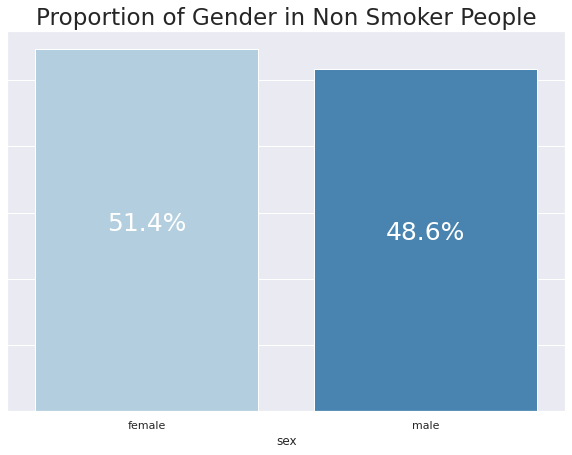

In [23]:
# prepare the data
sex_non_smoker_proportion = data_source.groupby(["smoker","sex"])["age"].count().reset_index()
sex_non_smoker_proportion = sex_non_smoker_proportion[sex_non_smoker_proportion["smoker"]=="no"]
sex_non_smoker_proportion.rename(columns = {"age":"count"}, inplace=True)

# create figure and axes
fig, ax = plt.subplots(figsize=(10,7))

# crate the proportion plot
blue_palette = sns.color_palette(palette='Blues', n_colors=2)
sns.barplot(data=sex_non_smoker_proportion, x="sex", y="count", palette=blue_palette)
ax.set(yticklabels=[])  
ax.set(ylabel=None)
for i in ax.patches:
    percentage = '{:.1f}%'.format(100*i.get_height()/sum(sex_non_smoker_proportion["count"]))
    x = i.get_x() + i.get_width()/2
    y = i.get_height()/2
    ax.annotate(percentage, (x,y), ha='center', fontsize=25, color="white")
ax.set_title("Proportion of Gender in Non Smoker People", fontsize=23)

# show the plot
plt.show()

__Note :__
- From the proportion analysis we know that for non smoker people, **51.4%** is female and **48.6%** is make. The difference is **not as high as difference in smoker group**

__Summary__
- Smoker proportion is much smaller than non-smoker proportion, **20.5% compare to 79.5%**.
- In smoker group, male has the largest proportion **58%**.
- In non smoker group, female has the largest proportion **51.4%**.

__Answering Question__<br>
<br>
**1. Which one larger, smoker proportion or non smoker?** : From the sex and smoker analysis I found that non smoker proportion is larger than smoker proportion. Non smoker comprises of 79.5% all user, while smoker just 20.5%. <br>
**2. How much is the probability of a female in smoker group?** : From the sex and smoker analysis I found that female has probability of 0.42 (42%) if known that the person is smoker <br>
**3. How much is the probability of a male in smoker group?** : From the sex and smoker analysis I found that male has probability of 0.58 (58%) if we known that the person is smoker <br>
**4. Which gender has the highest insurance charge?** : From the charge analysis in section before, by comparing median charges, I found that female charge is more expensive than male charges. \\$9413 compare to \\$9370

__Summary of Categorical Variable Analysis__

Every region has a nearly equal amount proportion of insurance users, **24.2-24.3%**, a **slight difference** exists in the **southeast region** with a proportion of **27,2%** of all insurance users. Every region also has a **nearly equal amount** of **gender proportion** between male and female, **50:50**, a **slight difference** also exists in the **southeast region** with a **proportion difference** of **1%** between male and female. The data confirm that the proportion of smoker people is less than non-smoker people, the **ratio of the smoker and non-smokers** in every region is around **1:4**. Within **smoker** people, the male proportion is larger than female, **58% compared to 42%**, while in **non-smoker** people, the female proportion is larger than male, **51.4% compared to 48,6%**. The **northeast** region became the region with the **relatively expensive** amount of insurance charge of around **\\$100508**, whereas the **southwest region** become the cheapest region with an insurance charge of around **\\$8799**.

---
## Step 3 : Continuous Variable Analysis (CDF)

### Charge Probability Analysis

#### 1. Smoker & Non Smoker Probability Charge Analysis

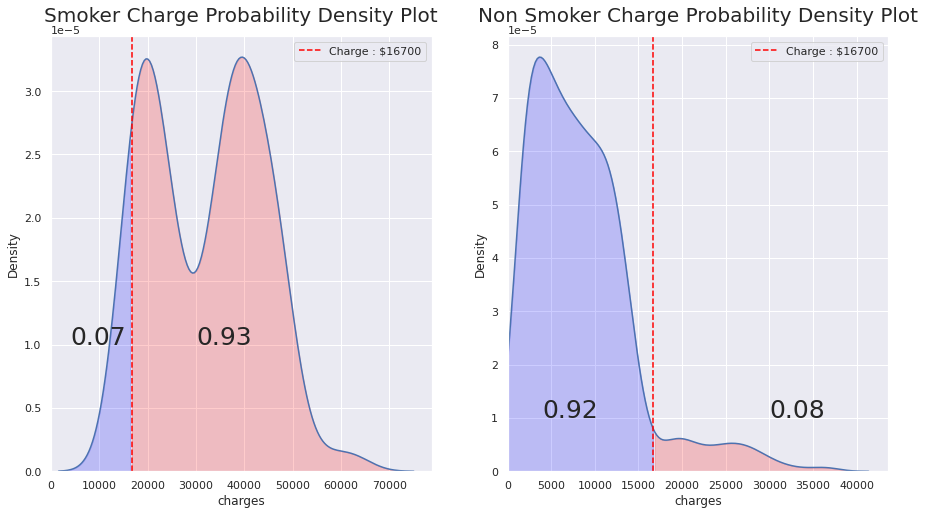

In [248]:
# prepare the data
smoker_data = data_source[data_source["smoker"]=="yes"]
smoker_more_16700 = smoker_data[smoker_data['charges']>16700]
smoker_less_16700 = smoker_data[smoker_data['charges']<=16700]
non_smoker_data = data_source[data_source["smoker"]=="no"]
non_smoker_more_16700 = non_smoker_data[non_smoker_data['charges']>16700]
non_smoker_less_16700 = non_smoker_data[non_smoker_data['charges']<=16700]

# create the figure and axes to plot the graph
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(15,8))

# set the plot style
sns.set(style="darkgrid")

# plot the smoker probability density curve
sns.kdeplot(data=smoker_data, x="charges", ax=ax[0])
ax[0].axvline(x=16700, color="red", linestyle="--", label="Charge : $16700")
kde_x_0, kde_y_0 = ax[0].lines[0].get_data()
ax[0].fill_between(kde_x_0, kde_y_0, where=(kde_x_0 > 16700), color='red', alpha=0.2)
ax[0].fill_between(kde_x_0, kde_y_0, where=(kde_x_0 < 16700), color='blue', alpha=0.2)
ax[0].text(x=30000, y=1e-5, s=f"{len(smoker_more_16700)/len(smoker_data):.2f}", fontsize=25)
ax[0].text(x=4000, y=1e-5, s=f"{len(smoker_less_16700)/len(smoker_data):.2f}", fontsize=25)
ax[0].set_title("Smoker Charge Probability Density Plot", fontsize=20, y=1.02)
ax[0].legend()
ax[0].set_xlim(left=0)

# plot the non_smoker probability density curve
sns.kdeplot(data=non_smoker_data, x="charges", ax=ax[1])
ax[1].axvline(x=16700, color="red", linestyle="--", label="Charge : $16700")
kde_x_1, kde_y_1 = ax[1].lines[0].get_data()
ax[1].fill_between(kde_x_1, kde_y_1, where=(kde_x_1 > 16700), color='red', alpha=0.2)
ax[1].fill_between(kde_x_1, kde_y_1, where=(kde_x_1 < 16700), color='blue', alpha=0.2)
ax[1].text(x=30000, y=1e-5, s=f"{len(non_smoker_more_16700)/len(non_smoker_data):.2f}", fontsize=25)
ax[1].text(x=4000, y=1e-5, s=f"{len(non_smoker_less_16700)/len(non_smoker_data):.2f}", fontsize=25)
ax[1].set_title("Non Smoker Charge Probability Density Plot", fontsize=20, y=1.02)
ax[1].legend()
ax[1].set_xlim(left=0)

# show the plot
plt.show()

__Note :__
- from this density plot we know that the probability of smoker will get insurance charge more than **\\$16700** is very large at **0.93**. I can state that it is very possible for smoker to get insurance charge more than **\\$16700**. And it is **rare** that smoker will get insurance chare **below \\$16700**, the probability is just **0.07**. 
- from this density plot we knoe that the probability of non smoker will get insurance charge for more than **\\$16700** is very small at **0.08**. I can say that it is **rare** for non smokers to have an insurance charge for more than **\\$16700**. But it is **common** for **non smoker** people to have insurance charge below **\\$16700**, the probability is **0.92**.
- smoker is a **high contributin factor** in determining the **insurance charge**.

#### 2. BMI Probability Charge Analysis

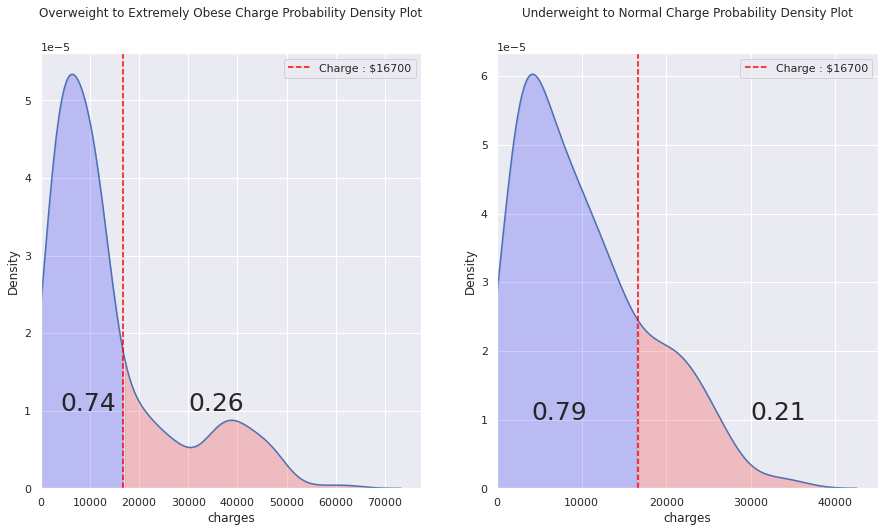

In [253]:
# prepare the data
overweight_data = data_source[data_source["bmi"]>=25]
overweight_more_16700 = overweight_data[overweight_data['charges']>16700]
overweight_less_16700 = overweight_data[overweight_data['charges']<=16700]
normal_data = data_source[data_source["bmi"]<25]
normal_more_16700 = normal_data[normal_data['charges']>16700]
normal_less_16700 = normal_data[normal_data['charges']<=16700]

# create the figure and axes to plot the graph
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(15,8))

# set the plot style
sns.set(style="darkgrid")

# plot the probability density curve for overweight
sns.kdeplot(data=overweight_data, x="charges", ax=ax[0])
ax[0].axvline(x=16700, color="red", linestyle="--", label="Charge : $16700")
kde_x_0, kde_y_0 = ax[0].lines[0].get_data()
ax[0].fill_between(kde_x_0, kde_y_0, where=(kde_x_0 > 16700), color='red', alpha=0.2)
ax[0].fill_between(kde_x_0, kde_y_0, where=(kde_x_0 < 16700), color='blue', alpha=0.2)
ax[0].text(x=30000, y=1e-5, s=f"{len(overweight_more_16700)/len(overweight_data):.2f}", fontsize=25)
ax[0].text(x=4000, y=1e-5, s=f"{len(overweight_less_16700)/len(overweight_data):.2f}", fontsize=25)
ax[0].set_title("Overweight to Extremely Obese Charge Probability Density Plot", fontsize=12, y=1.07)
ax[0].legend()
ax[0].set_xlim(left=0)

# plot the probability density curve for normal
sns.set(style="darkgrid")
sns.kdeplot(data=normal_data, x="charges", ax=ax[1])
ax[1].axvline(x=16700, color="red", linestyle="--", label="Charge : $16700")
kde_x_1, kde_y_1 = ax[1].lines[0].get_data()
ax[1].fill_between(kde_x_1, kde_y_1, where=(kde_x_1 > 16700), color='red', alpha=0.2)
ax[1].fill_between(kde_x_1, kde_y_1, where=(kde_x_1 < 16700), color='blue', alpha=0.2)
ax[1].text(x=30000, y=1e-5, s=f"{len(normal_more_16700)/len(normal_data):.2f}", fontsize=25)
ax[1].text(x=4000, y=1e-5, s=f"{len(normal_less_16700)/len(normal_data):.2f}", fontsize=25)
ax[1].set_title("Underweight to Normal Charge Probability Density Plot", fontsize=12, y=1.07)
ax[1].legend()
ax[1].set_xlim(left=0)

# show the plot
plt.show()

__Note :__
- From this density plot we know that the probability of people with BMI >= 25 (Overweight to Extremely Obese) to have insurance charge of more than **\\$16700** is **0.26**. Then it is more posible to get the insurance charge **below \\$16700**, because the probability is **0.74**.
- from this density plot we know that  the probability for people with BMI < 25 (underweight to normal) to have insurance charge for more than **\\$16700** is **0.21**. Then it is more posible to get the insurance charge **below \\$16700**, because the probability is **0.79**.
- The probability to get insurance charge for more than \\$16700 is **higher when the people are overweight**, but the **factor is not as strong as smoker**.

#### 3. Smoker, Non Smoker, & BMI Probability Charge Analysis

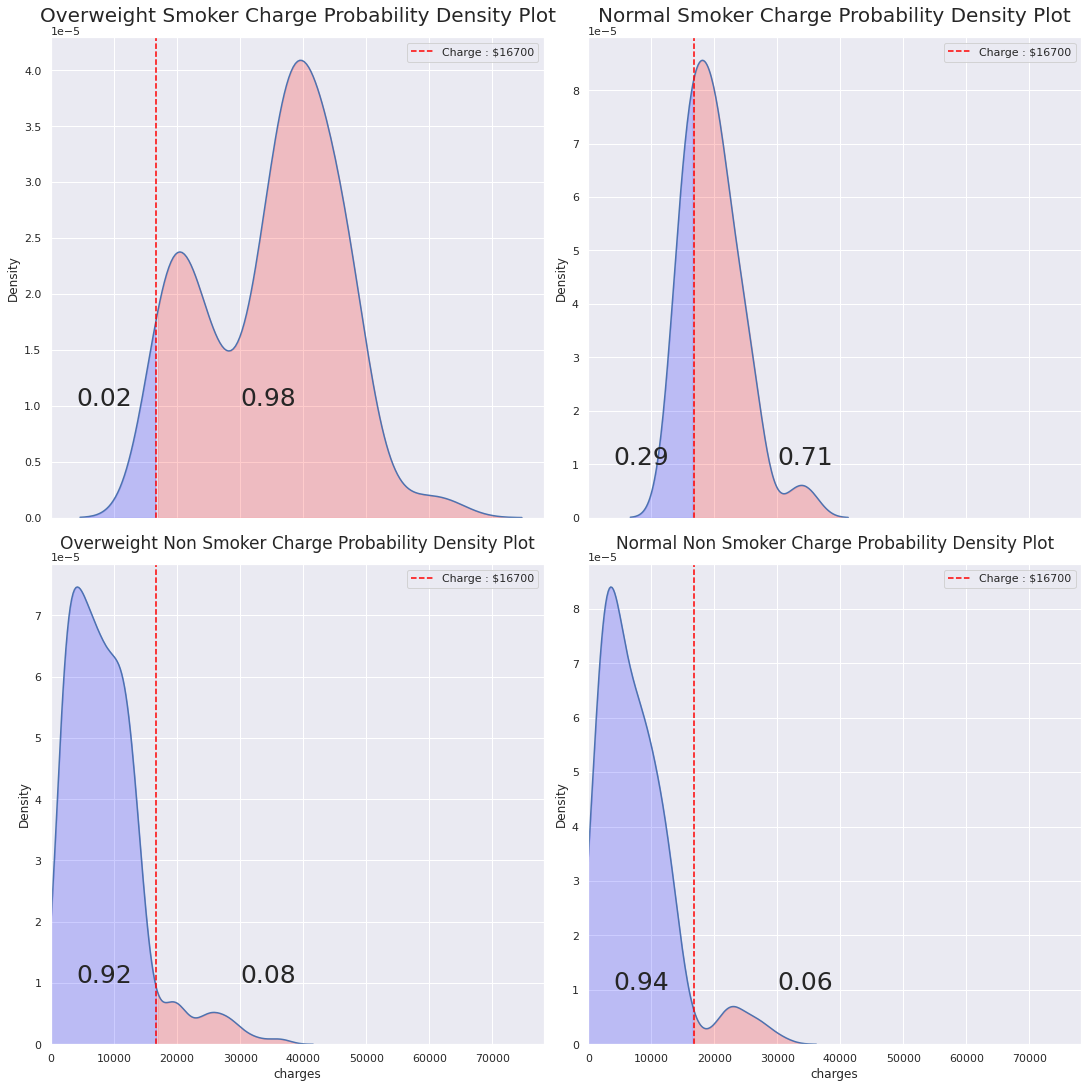

In [270]:
# prepare the data
smoker_overweight_data = data_source[(data_source["bmi"]>=25) & (data_source["smoker"]=="yes")]
smoker_overweight_more_16700 = smoker_overweight_data[smoker_overweight_data['charges']>16700]
smoker_overweight_less_16700 = smoker_overweight_data[smoker_overweight_data['charges']<=16700]

smoker_normal_data = data_source[(data_source["bmi"]<25) & (data_source["smoker"]=="yes")]
smoker_normal_more_16700 = smoker_normal_data[smoker_normal_data['charges']>16700]
smoker_normal_less_16700 =smoker_normal_data[smoker_normal_data['charges']<=16700]

non_smoker_overweight_data = data_source[(data_source["bmi"]>=25) & (data_source["smoker"]=="no")]
non_smoker_overweight_more_16700 = non_smoker_overweight_data[non_smoker_overweight_data['charges']>16700]
non_smoker_overweight_less_16700 =non_smoker_overweight_data[non_smoker_overweight_data['charges']<=16700]

non_smoker_normal_data = data_source[(data_source["bmi"]<25) & (data_source["smoker"]=="no")]
non_smoker_normal_more_16700 = non_smoker_normal_data[non_smoker_normal_data['charges']>16700]
non_smoker_normal_less_16700 = non_smoker_normal_data[non_smoker_normal_data['charges']<=16700]

# create the figure and axes to plot the graph
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(15,15), constrained_layout=True, sharex=True)

# set the plot theme
sns.set(style="darkgrid")

# plot the smoker overweight data
sns.kdeplot(data=smoker_overweight_data, x="charges", ax=ax[0][0])
ax[0][0].axvline(x=16700, color="red", linestyle="--", label="Charge : $16700")
kde_x_0, kde_y_0 = ax[0][0].lines[0].get_data()
ax[0][0].fill_between(kde_x_0, kde_y_0, where=(kde_x_0 > 16700), color='red', alpha=0.2)
ax[0][0].fill_between(kde_x_0, kde_y_0, where=(kde_x_0 < 16700), color='blue', alpha=0.2)
ax[0][0].text(x=30000, y=1e-5, s=f"{len(smoker_overweight_more_16700)/len(smoker_overweight_data):.2f}", fontsize=25)
ax[0][0].text(x=4000, y=1e-5, s=f"{len(smoker_overweight_less_16700)/len(smoker_overweight_data):.2f}", fontsize=25)
ax[0][0].set_title("Overweight Smoker Charge Probability Density Plot", fontsize=20, y=1.02)
ax[0][0].legend()
ax[0][0].set_xlim(left=0)

# plot the smoker normal data
sns.kdeplot(data=smoker_normal_data, x="charges", ax=ax[0][1])
ax[0][1].axvline(x=16700, color="red", linestyle="--", label="Charge : $16700")
kde_x_1, kde_y_1 = ax[0][1].lines[0].get_data()
ax[0][1].fill_between(kde_x_1, kde_y_1, where=(kde_x_1 > 16700), color='red', alpha=0.2)
ax[0][1].fill_between(kde_x_1, kde_y_1, where=(kde_x_1 < 16700), color='blue', alpha=0.2)
ax[0][1].text(x=30000, y=1e-5, s=f"{len(smoker_normal_more_16700)/len(smoker_normal_data):.2f}", fontsize=25)
ax[0][1].text(x=4000, y=1e-5, s=f"{len(smoker_normal_less_16700)/len(smoker_normal_data):.2f}", fontsize=25)
ax[0][1].set_title("Normal Smoker Charge Probability Density Plot", fontsize=20, y=1.02)
ax[0][1].legend()
ax[0][1].set_xlim(left=0)

# plot the non smoker overweight data
sns.kdeplot(data=non_smoker_overweight_data, x="charges", ax=ax[1][0])
ax[1][0].axvline(x=16700, color="red", linestyle="--", label="Charge : $16700")
kde_x_2, kde_y_2 = ax[1][0].lines[0].get_data()
ax[1][0].fill_between(kde_x_2, kde_y_2, where=(kde_x_2 > 16700), color='red', alpha=0.2)
ax[1][0].fill_between(kde_x_2, kde_y_2, where=(kde_x_2 < 16700), color='blue', alpha=0.2)
ax[1][0].text(x=30000, y=1e-5, s=f"{len(non_smoker_overweight_more_16700)/len(non_smoker_overweight_data):.2f}", fontsize=25)
ax[1][0].text(x=4000, y=1e-5, s=f"{len(non_smoker_overweight_less_16700)/len(non_smoker_overweight_data):.2f}", fontsize=25)
ax[1][0].set_title("Overweight Non Smoker Charge Probability Density Plot", fontsize=17, y=1.02)
ax[1][0].legend()
ax[1][0].set_xlim(left=0)

# plot the non smoker normal data
sns.kdeplot(data=non_smoker_normal_data, x="charges", ax=ax[1][1])
ax[1][1].axvline(x=16700, color="red", linestyle="--", label="Charge : $16700")
kde_x_3, kde_y_3 = ax[1][1].lines[0].get_data()
ax[1][1].fill_between(kde_x_3, kde_y_3, where=(kde_x_3 > 16700), color='red', alpha=0.2)
ax[1][1].fill_between(kde_x_3, kde_y_3, where=(kde_x_3 < 16700), color='blue', alpha=0.2)
ax[1][1].text(x=30000, y=1e-5, s=f"{len(non_smoker_normal_more_16700)/len(non_smoker_normal_data):.2f}", fontsize=25)
ax[1][1].text(x=4000, y=1e-5, s=f"{len(non_smoker_normal_less_16700)/len(non_smoker_normal_data):.2f}", fontsize=25)
ax[1][1].set_title("Normal Non Smoker Charge Probability Density Plot", fontsize=17, y=1.02)
ax[1][1].legend()
ax[1][1].set_xlim(left=0)

# show the plot
plt.show()

__Note :__
- from this plot we know that **smoking really increase the probability** of a person to get **insurance charge for more than \\$16700**. As an example for **BMI normal person** the probability to get charge for more than **\\$16700** is just **0.06**, but **if** he/she **smoking**, the **probability** could **increase** into **0.71**.
- overweight also increase the probability to get insurance charge for more than \\$16700 but **not as strong as smoking**, for example if the **person are don't smoke** and have a **normal BMI**, the **probability** to get the insurance charge for **more than \\$16700** is just **0.06**, but then if he/she have the **BMI overweight** the probability just increase **0.02 into 0.08**. This is a slight change, compare to smoking.

__Summary__ :
- __Smoking__ is __highly related__ to the __expensiveness__ of the insurance charge
- __BMI__ also __contibute__ to the __expensiveness__ of the insurance chage but __not as big as smoking__.

__Answering Question__<br>
<br>
**1. What is the probability of a smoker to have insurance charge for more than \\$16.7k?** : From the analysis result the probability of a  person to have insurance chage for more than \\$16.7k is 0.93<br>
**2. What is the probability of a smoker with BMI more than 25 to have insurance charge for more than \\$16.7k?** : From the analysis result the probability of a smoker with BMI more than 25 to have insurance charge for more than \\$16.7k is 0.98 <br>
**3. Which one more possible, a person with BMI more than 25 get charges for more than \\$16700 or a person with BMI less than 25 to get charges for more than \\$16700**? : From the analysis result the probability of a person with BMI more than 25 get charges for more than \\$16700 is **0.26**, while the probability of a person with BMI less than 25 to get charges for more than \\$16700 is **0.21**. This is just a slight difference, but if the person are overweight he/she is more posibble to get the insurance charge for more than \\$16700 <br>
**4. Which one more possible a smoker with BMI more than 25 will get charge for more than 16700 or a non smoker with BMI more than 25 will get charge for more than 16700?** : From the analysis result it is indeed that the smoker person will be more possible to get the charge for more than \\$16700. The probability of a smoker with BMI more than 25 will get charge for more than 16700 is **0.98**, while very differently the probability of a non smoker with BMI more than 25 will get charge for more than 16700 is just **0.08**. This is a very different probability value

__Summary of Continuous Variable Analysis__

The probability of a **smoker** getting an insurance charge of **more than \\$16700** is **very large, more than 0.7**, without taking into account his/her BMI factor. **BMI Factor** also **contributes to the expensiveness of insurance charges**, but the effect **is not as strong** as if he/she **smokes**. For **smokers**, the **difference** of probability between a normal BMI smoker, and with overweight BMI smoker is **0.27**, while for **non-smokers** the **difference** of probability between a normal BMI smoker, and with overweight BMI smoker is just **0.02**, this difference is very significant, thus **smoking is a great factor** affecting the insurance charges.

---
## Step 4 : Correlation Variable Analysis

#### 1. Correlation Analysis of Numerical Variables

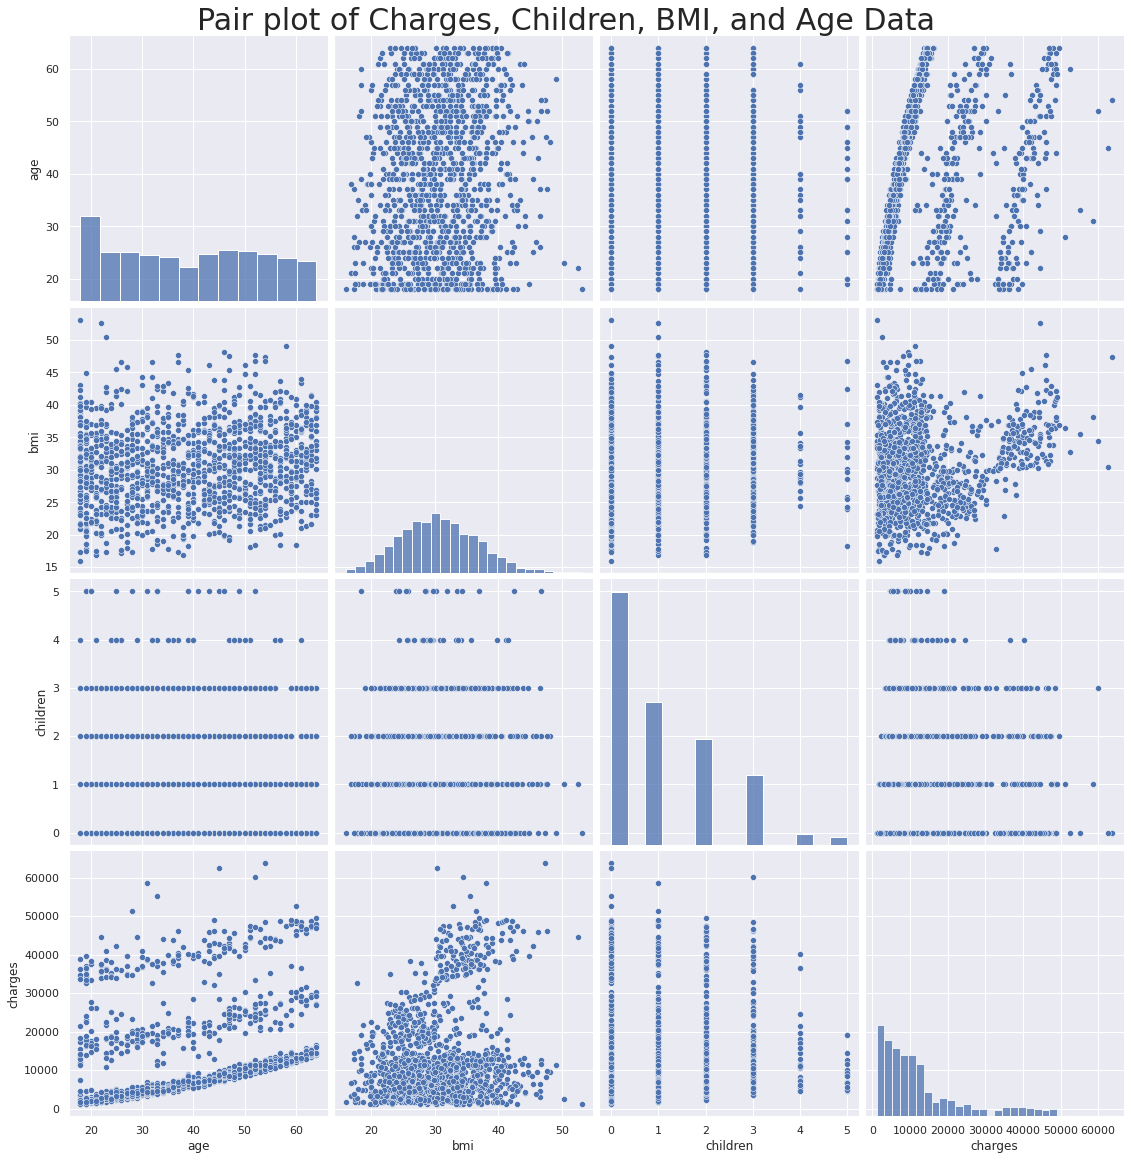

In [29]:
sns.set(style="darkgrid")
sns.pairplot(data_source, height=4)
plt.suptitle("Pair plot of Charges, Children, BMI, and Age Data", fontsize="30", y=1.01)
plt.show()

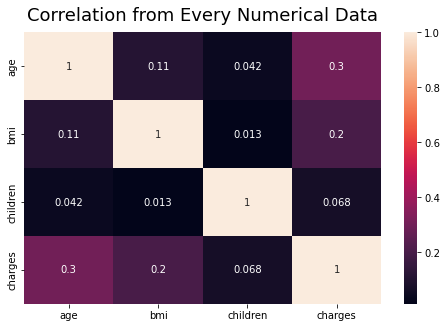

In [26]:
fig,ax = plt.subplots(figsize=(8,5))
sns.heatmap(data_source.corr(), annot=True, ax=ax)
ax.set_title("Correlation from Every Numerical Data", fontsize=18, y=1.02)
plt.show()

__Note :__
- From the pair plot we could see that there are pattern in __age__ vs __charges__ scatter plot, but in the correlation map the correlation is so small, just __0.3__
- There are no __strong correlation__ shown by the correlation map, every value fall below __0.5__

#### 2. Correlation Analysis of Smoker and Non Smoker

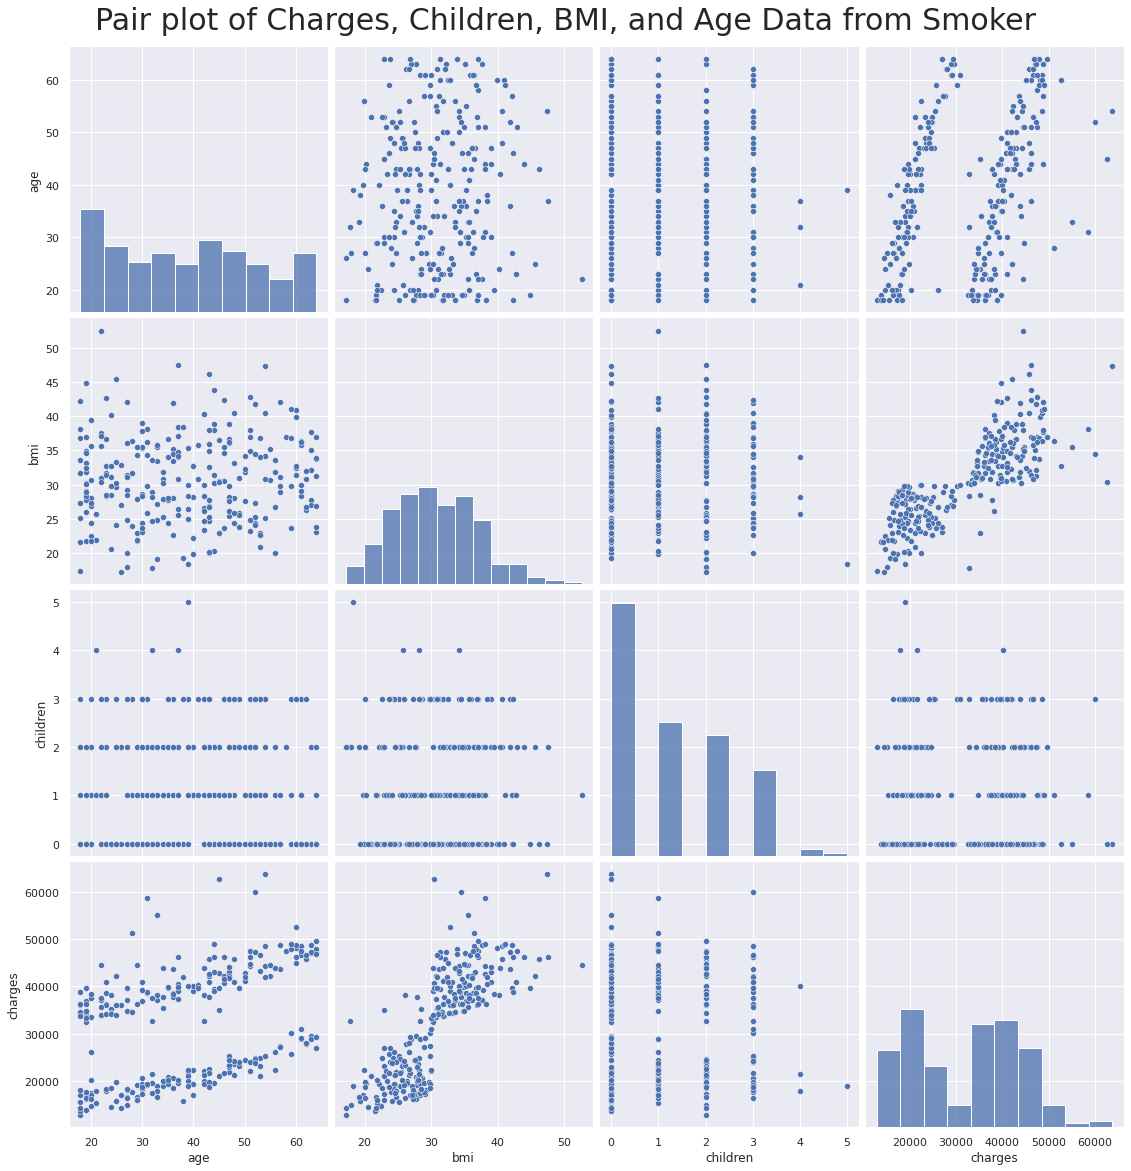

In [30]:
sns.set(style="darkgrid")
sns.pairplot(data_source[data_source["smoker"]=="yes"], height=4)
plt.suptitle("Pair plot of Charges, Children, BMI, and Age Data from Smoker", fontsize="30", y=1.02)
plt.show()

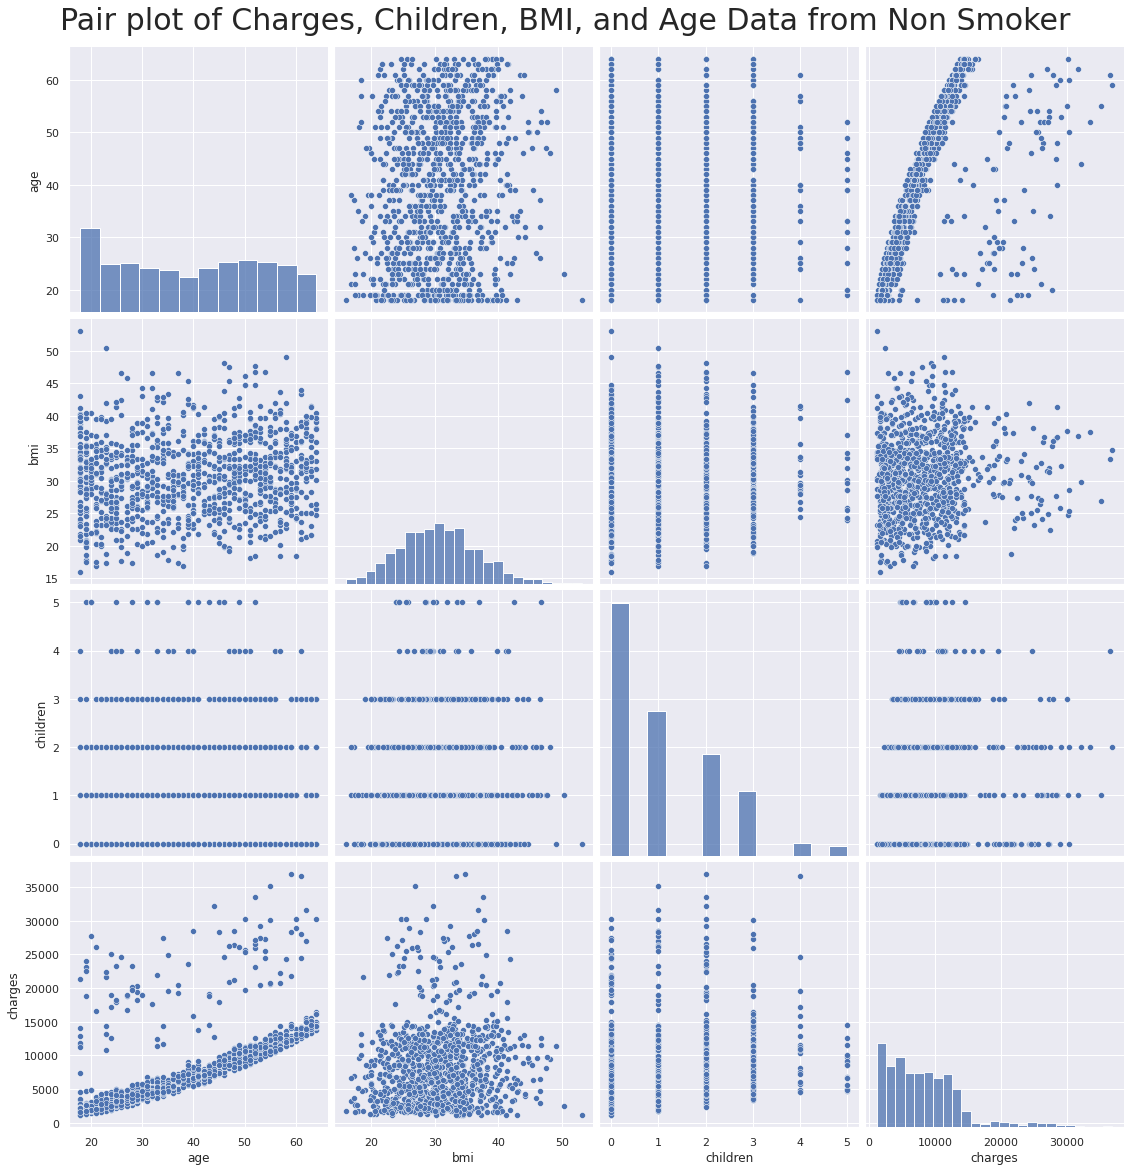

In [32]:
sns.set(style="darkgrid")
sns.pairplot(data_source[data_source["smoker"]=="no"], height=4)
plt.suptitle("Pair plot of Charges, Children, BMI, and Age Data from Non Smoker", fontsize="30", y=1.02)
plt.show()

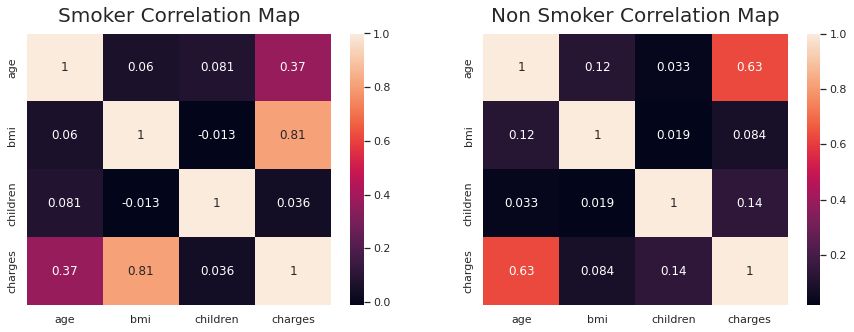

In [36]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

sns.heatmap(data_source[data_source["smoker"]=="yes"].corr(), annot=True, ax=ax[0])
sns.heatmap(data_source[data_source["smoker"]=="no"].corr(), annot=True, ax=ax[1])
ax[0].set_title("Smoker Correlation Map", fontsize=20, y=1.02)
ax[1].set_title("Non Smoker Correlation Map", fontsize=20, y=1.02)

plt.show()

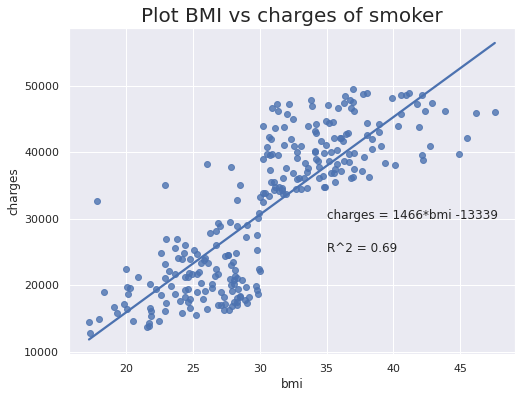

In [128]:
#prepare the data
smoker_data = data_source[(data_source["smoker"]=="yes")
                         &(data_source["charges"]<50000)
                         &(data_source["bmi"]<50)]

# create figure and axes for plot
fig, ax = plt.subplots(figsize=(8,6))

# plot the scatter plot
p = sns.regplot(data=smoker_data, x="bmi", y="charges", ax=ax, ci=None)
ax.set_title("Plot BMI vs charges of smoker", fontsize=20)

# calculate the linear regresion coefficient
x = smoker_data["bmi"].values.reshape((-1,1))
y = smoker_data["charges"].values
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)

# write the equation in the plot
ax.text(x=35, y=30000, s=f"charges = {model.coef_[0]:.0f}*bmi {model.intercept_:.0f}",
       fontsize="12")
ax.text(x=35, y=25000, s=f"R^2 = {r_sq:.2f}", fontsize="12")

# show the data
plt.show()

__Note :__
- From the pairplot and correlation map of smoker, we know that there are positive weak correlation, __0.37__, __between age and charges__, I can found the pattern in the scatterplot. Also I get a pattern in __BMI and charges__, with strong positive correlation __0.81__. This could mean that for smoker, the __higher the BMI the more expensive the insurance charge__.
- From the regresion plot we get info that the equation between the __BMI and Charges__, this could state that if the **BMI** of insurance user increase by **one value**, the **charges** will **increase by \\$1466**.
- From the pairplot and correlation map of non smoker, we know that there are positive strong correlation in __age vs charge__, with correlation value __0.63__, this could mean that for non smoker, __the older the insurance user the more expensive the insurance charge__. 

#### 3. Correlation Analysis of Normal Smoker and Overweight Smoker

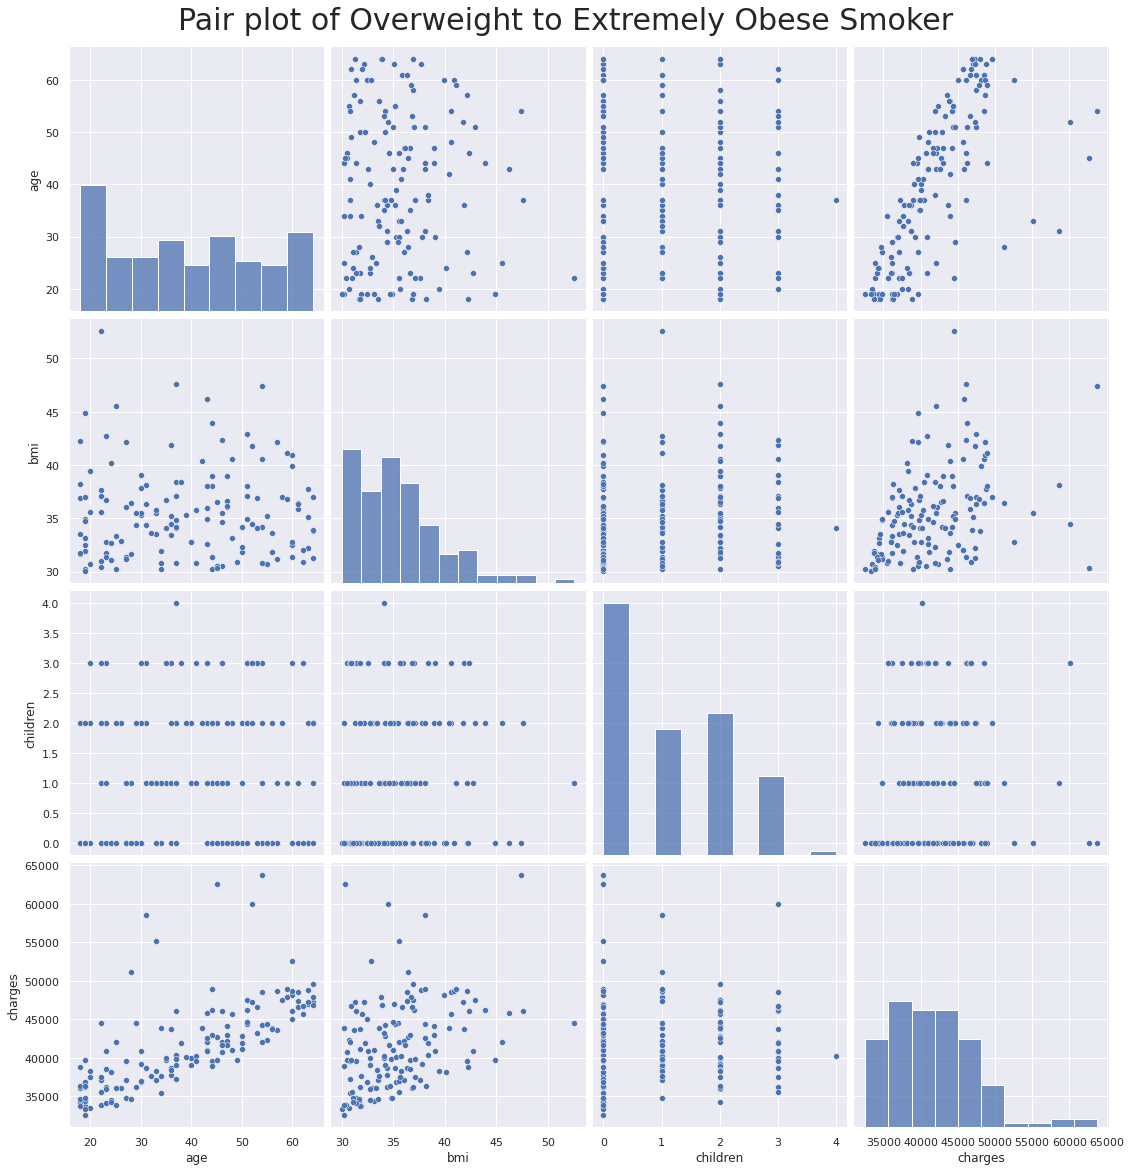

In [103]:
sns.pairplot(data_source[(data_source["smoker"]=="yes") & (data_source["bmi"] > 30)], height=4)
plt.suptitle("Pair plot of Overweight to Extremely Obese Smoker", fontsize="30", y=1.02)
plt.show()

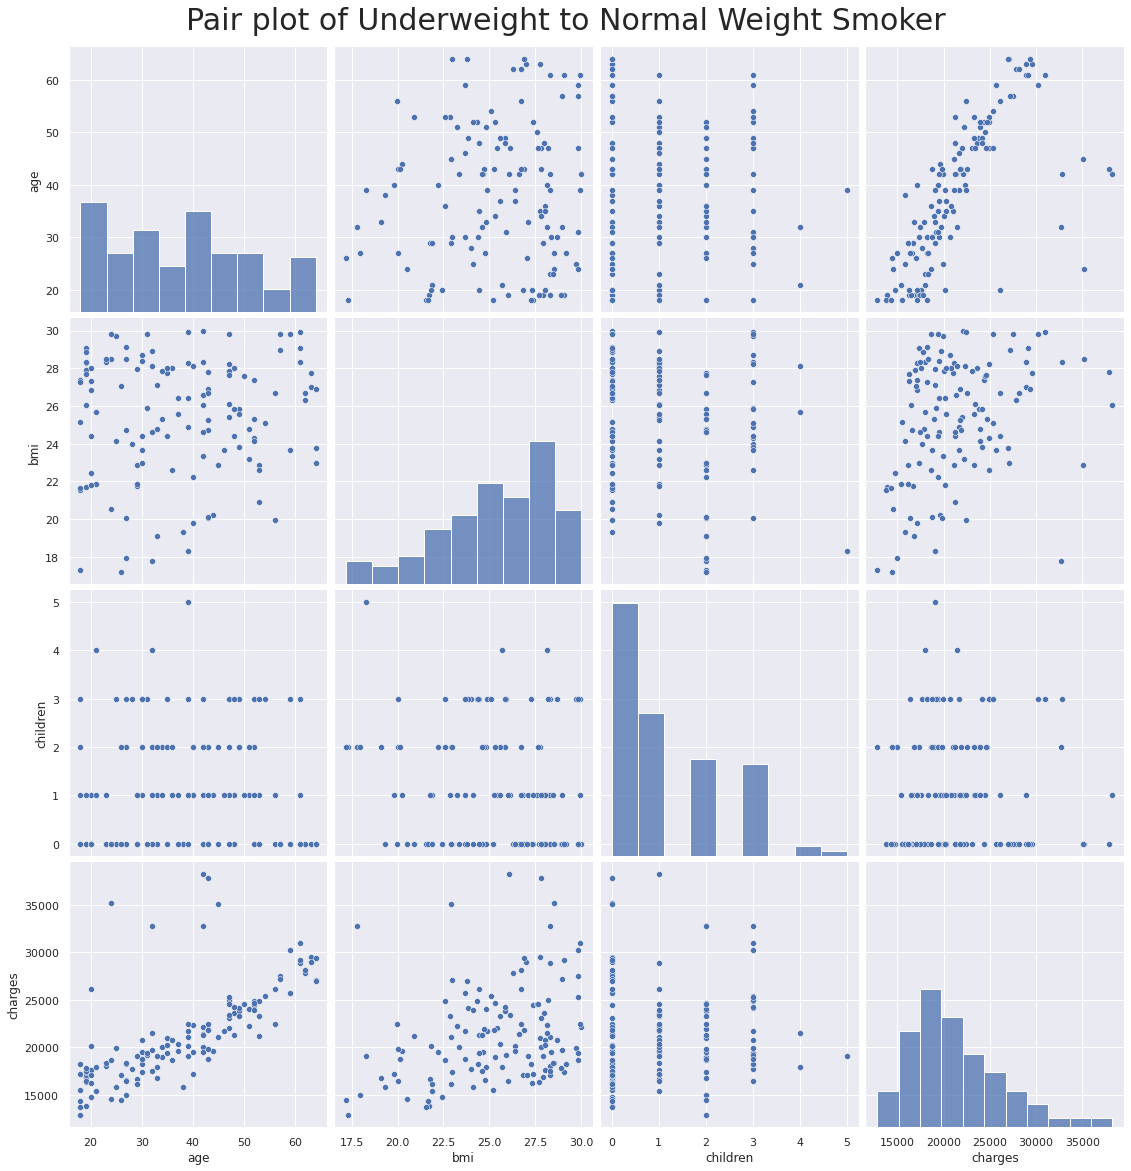

In [112]:
sns.pairplot(data_source[(data_source["smoker"]=="yes") & (data_source["bmi"] <= 30)], height=4)
plt.suptitle("Pair plot of Underweight to Normal Weight Smoker", fontsize="30", y=1.02)
plt.show()

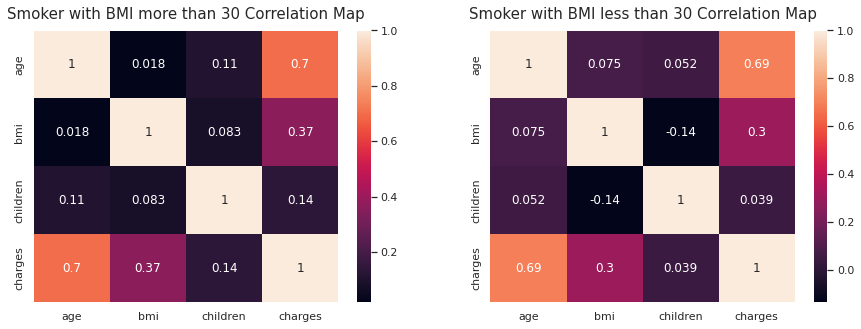

In [106]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

sns.heatmap(data_source[(data_source["smoker"]=="yes") & (data_source["bmi"] > 30)].corr(), annot=True, ax=ax[0])
sns.heatmap(data_source[(data_source["smoker"]=="yes") & (data_source["bmi"] <= 30)].corr(), annot=True, ax=ax[1])

ax[0].set_title("Smoker with BMI more than 30 Correlation Map", fontsize=15, y=1.02)
ax[1].set_title("Smoker with BMI less than 30 Correlation Map", fontsize=15, y=1.02)

plt.show()

__Note :__
- After separation using BMI factor we could see that the correlation value from age and charge increase to 0.7, this is a strong correlation. This could mean that there are indeed a relationship between __age and charges__. 

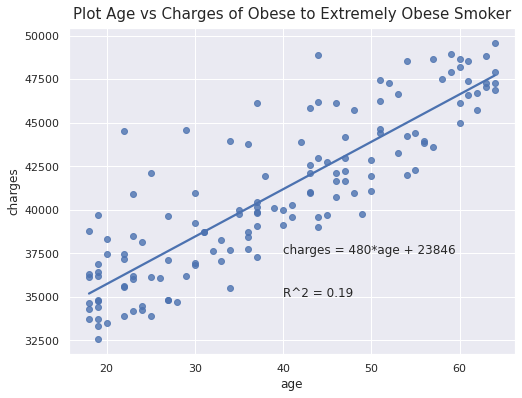

In [22]:
#prepare the data
smoker_overweight_data = data_source[(data_source["smoker"]=="yes") & (data_source["bmi"] > 30)
                                    & (data_source["charges"]<50000)]

# create figure and axes for plot
fig, ax = plt.subplots(figsize=(8,6))

# plot the scatter plot
p = sns.regplot(data=smoker_overweight_data, x="age", y="charges", ax=ax, ci=None)
ax.set_title("Plot Age vs Charges of Obese to Extremely Obese Smoker", fontsize=15, y=1.01)

# calculate the linear regresion coefficient
x = smoker_overweight_data["bmi"].values.reshape((-1,1))
y = smoker_overweight_data["charges"].values
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)

# write the equation in the plot
ax.text(x=40, y=37500, s=f"charges = {model.coef_[0]:.0f}*age + {model.intercept_:.0f}",
       fontsize="12")
ax.text(x=40, y=35000, s=f"R^2 = {r_sq:.2f}", fontsize="12")

# show the data
plt.show()

__Note :__
- with linear regression of smoker overweight to extremely obese data, we can quantify the relationship __between the age and charges__. From this plot we know that if age was __increase__ by __one value__, there will be an __increase of insurance charge__ by __\\$480__. With minimum charge for overweight smoker is at **\\$23846**. This is i think an expensive values. 

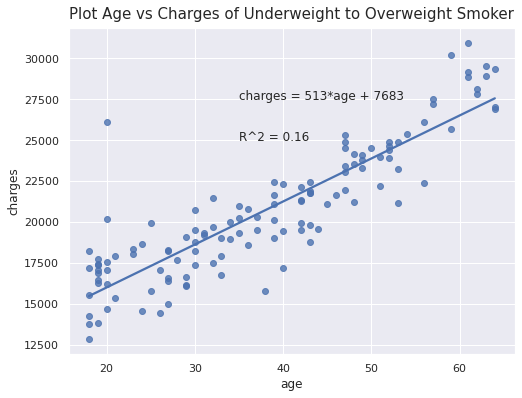

In [21]:
#prepare the data
smoker_normal_data = data_source[(data_source["smoker"]=="yes") & (data_source["bmi"] <= 30)
                                & (data_source["charges"]<31000)]

# create figure and axes for plot
fig, ax = plt.subplots(figsize=(8,6))

# plot the scatter plot
p = sns.regplot(data=smoker_normal_data, x="age", y="charges", ax=ax, ci=None)
ax.set_title("Plot Age vs Charges of Underweight to Overweight Smoker", fontsize=15, y=1.01)

# calculate the linear regresion coefficient
x = smoker_normal_data["bmi"].values.reshape((-1,1))
y = smoker_normal_data["charges"].values
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)

# write the equation in the plot
ax.text(x=35, y=27500, s=f"charges = {model.coef_[0]:.0f}*age + {model.intercept_:.0f}",
       fontsize="12")
ax.text(x=35, y=25000, s=f"R^2 = {r_sq:.2f}", fontsize="12")

# show the data
plt.show()

__Note :__
- with linear regression of smoker underweight to normal we can quantify the relationship __between the age and charges__. From this plot we know that if age was __increase__ by __one value__, there will be an __increase of insurance charge__ by __\\$513__. With minimum charge for **\\$7683**. This value is lower than smoker with high BMI. This is aligned with analysis before, people whom smoke and have a high BMI tend to have an expensive insurance charge.

#### 3. Non smoker age vs charges

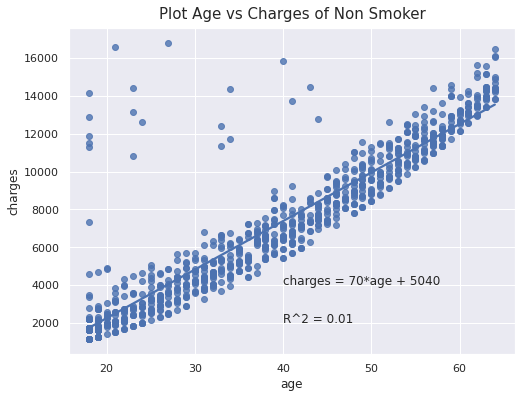

In [137]:
#prepare the data
non_smoker_data = data_source[(data_source["smoker"]=="no")
                              & (data_source["charges"]<17000)]

# create figure and axes for plot
fig, ax = plt.subplots(figsize=(8,6))

# plot the scatter plot
p = sns.regplot(data=non_smoker_data, x="age", y="charges", ax=ax, ci=None)
ax.set_title("Plot Age vs Charges of Non Smoker", fontsize=15, y=1.01)

# calculate the linear regresion coefficient
x = non_smoker_data["bmi"].values.reshape((-1,1))
y = non_smoker_data["charges"].values
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)

# write the equation in the plot
ax.text(x=40, y=4000, s=f"charges = {model.coef_[0]:.0f}*age + {model.intercept_:.0f}",
       fontsize="12")
ax.text(x=40, y=2000, s=f"R^2 = {r_sq:.2f}", fontsize="12")

# show the data
plt.show()

__Note :__
- we know that from the pairplot of non smoker data, the correlation of age and charges is 0.63. I think this could be important correlation for non-smoker data. From the linear regression we know that if the __age__ was increase by __one value__, there will be an increase in charge by __\\$70 dollar__, this is relatively a low value if we compare to smoker data. With a minimum value of __$5040__, compare to smoker linear regresion minimum value, non smoker indeed has a low insurance charge. 

#### Children vs Charges

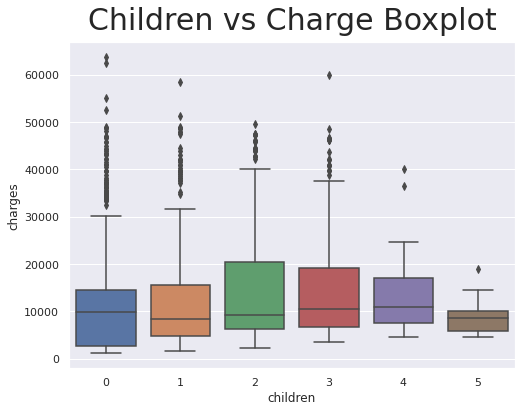

In [12]:
fig,ax = plt.subplots(figsize=(8,6))

sns.set(style="darkgrid")
sns.boxplot(data=data_source, x="children", y="charges")
ax.set_title("Children vs Charge Boxplot", fontsize=30, y=1.02)

plt.show()

__Note :__
- by plotting boxplot with charges for every number of children does the insurance user has, I think there is __no relationship between the children and charges__. From the boxplot we could see that __all the distribution__ for every number of children are __positively skewed__. If we look at the median, the value is __relatively same at \\$10000__. 

__Summary :__
- Relationship between charges and BMI for smoker is :

$$
    charges = 1466 x BMI - 13339; smoker
$$

- Relationship between charges and age for smoker with BMI more than 30 is :

$$
    charges = 480 x age + 23846 ; smoker and BMI > 30
$$

- Relationship between charges and age for smoker with BMI less than 30 is :

$$
    charges = 513 x age + 7683 ; smoker and BMI <=30
$$

- Relationship between charges and age for non smoker is :

$$
    charges = 70 x age + 5040 ; non smoker
$$

- from the equation we could see that **smoker with High BMI** will get the **most expensive** insurance charge, and **non smoker** will get **relatively cheap insurance charge** compare to smoker.
- There are **no relationship** between **number of children** does the insurance user has with **the insurance charge** that he/she will get

__Summary of Correlation Variable Analysis__

There is a correlation between smokers, non-smokers, BMI values, and age of insurance users to insurance charges that they have. Correlation analysis shows that **people who smoke** and have a **high value of BMI** tend to have an expensive insurance charge, the minimum charge value for them is **$32500** and the value will increase by **$480** dollars if the insurance user gets older. **Smoker** with **middle to low-value BMI** will have relatively cheaper insurance charges than smokers with high BMI values, the minimum charge for them is **$12500** and the value will increase by **$513 dollars** if the insurance user gets older. **Non-smokers**, compared to smokers, have really **cheap charges**, their minimum value is around **$1000** and the charges will increase by just **$70** dollars if they get older. Then we could know that **smoking and BMI really affects the expense of insurance charge**. 

## Step 5 : Hypothesis Testing

### 1. Smoker insurance charge is higher than non smoker insurance charge

The hypothesis that we will test is
$$H_0: \mu_{Charge|Smoker} <= \mu_{Charge|Non-Smoker}$$
$$H_1: \mu_{Charge|Smoker} > \mu_{Charge|Non-Smoker}$$

Reject Ho. Hence in a Population, Smoker Insurance Charge is higher than non smoker insurance charge


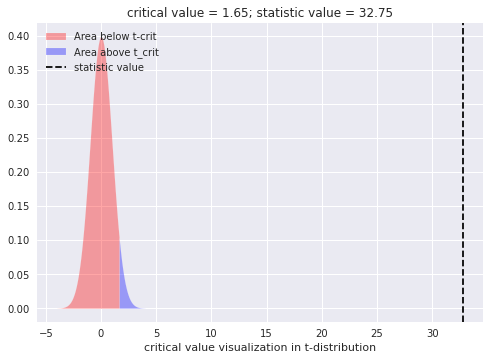

In [26]:
smoker = data_source[data_source['smoker']=='yes']["charges"]
non_smoker = data_source[data_source['smoker']=='no']["charges"]
alpha=0.05
stat, p = ttest_ind(smoker, non_smoker, equal_var=False, alternative='greater')

if p < alpha:
    print('Reject Ho. Hence in a Population, Smoker Insurance Charge is higher than non smoker insurance charge') 
else:
    print('Fail to reject Ho, there are not enough evidence to prove Smoker Insurance Charge is higher than non smoker insurance charge in a population')
    
df=(len(smoker)+len(non_smoker)-2)
t_crit = -t.ppf(alpha,df=df)
plt.style.use('seaborn')

plt.fill_between(x=np.arange(-4,t_crit,0.01),
                 y1= t.pdf(np.arange(-4,t_crit,0.01), df=df) ,
                 facecolor='red',
                 alpha=0.35,
                 label= 'Area below t-crit')

plt.fill_between(x=np.arange(t_crit,4,0.01), 
                     y1= t.pdf(np.arange(t_crit,4,0.01), df=df) ,
                     facecolor='blue',
                     alpha=0.35, 
                     label= 'Area above t_crit')
plt.axvline(x=stat, color="black", linestyle="--", label=f"statistic value")
plt.legend()
plt.xlabel("critical value visualization in t-distribution")
plt.title(f'critical value = {round(t_crit,2)}; statistic value = {round(stat,2)}')
plt.show()

__Note :__
- from the dual mean test, we are **95%** confidence that in a population of insurance users, **smoker insurance charge will be greater than non smoker insurance charge**. 

### 2. Insurance Charge with BMI > 25 is higher than insurance charge with BMI < 25

The hypothesis that we will test is
$$H_0: \mu_{Charge|BMI>25} <= \mu_{Charge|BMI<=25}$$
$$H_1: \mu_{Charge|BMI>25} > \mu_{Charge|BMI<=25}$$

Reject Ho. Hence in a Population, Insurance Charge with BMI > 25 is higher than insurance charge with BMI < 25


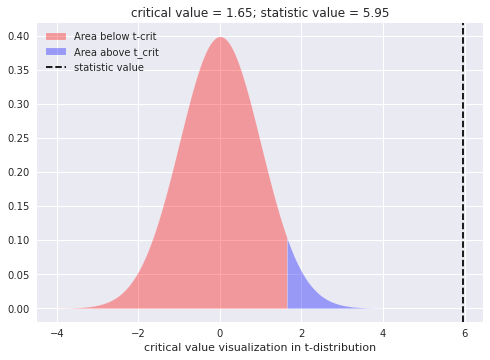

In [25]:
normal = data_source[data_source['bmi']<=25]["charges"]
overweight = data_source[data_source['bmi']>25]["charges"]
alpha=0.05
stat, p = ttest_ind(overweight, normal, equal_var=False, alternative='greater')

if p < alpha:
    print('Reject Ho. Hence in a Population, Insurance Charge with BMI > 25 is higher than insurance charge with BMI < 25') 
else:
    print('Fail to reject Ho, there are not enough evidence to prove Insurance Charge with BMI > 25 is higher than insurance charge with BMI < 25 in a population')
    
df=(len(normal)+len(overweight)-2)
t_crit = -t.ppf(alpha,df=df)
plt.style.use('seaborn')

plt.fill_between(x=np.arange(-4,t_crit,0.01),
                 y1= t.pdf(np.arange(-4,t_crit,0.01), df=df) ,
                 facecolor='red',
                 alpha=0.35,
                 label= 'Area below t-crit')

plt.fill_between(x=np.arange(t_crit,4,0.01), 
                     y1= t.pdf(np.arange(t_crit,4,0.01), df=df) ,
                     facecolor='blue',
                     alpha=0.35, 
                     label= 'Area above t_crit')
plt.axvline(x=stat, color="black", linestyle="--", label=f"statistic value")
plt.legend()
plt.xlabel("critical value visualization in t-distribution")
plt.title(f'critical value = {round(t_crit,2)}; statistic value = {round(stat,2)}')
plt.show()

__Note :__
- from the dual mean test, we are **95%** confidence that in a population of insurance users, **smoker Insurance Charge with BMI more than 25 is higher than insurance charge with BMI less than 25**. 

### 3. Male and Female BMI is simillar

The hypothesis that we will test is
$$H_0: \mu_{BMI|Male} \neq \mu_{BMI|Female}$$
$$H_1: \mu_{BMI|Male} = \mu_{BMI|Female}$$

Fail to reject Ho, there are not enough evidence to prove male BMI is simillar with female BMI in a population


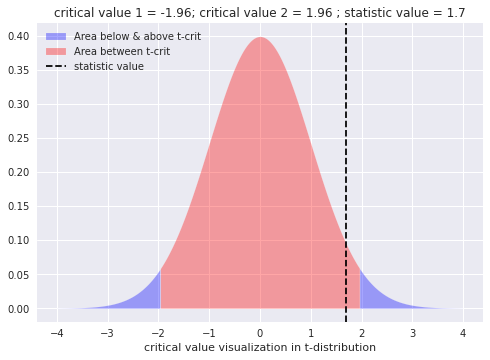

In [24]:
male = data_source[data_source['sex']=="male"]["bmi"]
female = data_source[data_source['sex']=="female"]["bmi"]
alpha=0.05
stat, p = ttest_ind(male, female, equal_var=False, alternative='two-sided')

if p < alpha:
    print('Reject Ho. Hence in a Population, male BMI is simillar with female BMI') 
else:
    print('Fail to reject Ho, there are not enough evidence to prove male BMI is simillar with female BMI in a population')
    
df=(len(male)+len(female)-2)
t_crit_1 = t.ppf(alpha/2,df=df)
t_crit_2 = -t.ppf(alpha/2,df=df)
plt.style.use('seaborn')

plt.fill_between(x=np.arange(-4,t_crit_1,0.01),
                 y1= t.pdf(np.arange(-4,t_crit_1,0.01), df=df) ,
                 facecolor='blue',
                 alpha=0.35,
                 label= 'Area below & above t-crit')

plt.fill_between(x=np.arange(t_crit_1,t_crit_2,0.01),
                 y1= t.pdf(np.arange(t_crit_1,t_crit_2,0.01), df=df) ,
                 facecolor='red',
                 alpha=0.35,
                 label= 'Area between t-crit')

plt.fill_between(x=np.arange(t_crit_2,4,0.01), 
                     y1= t.pdf(np.arange(t_crit_2,4,0.01), df=df) ,
                     facecolor='blue',
                     alpha=0.35)

plt.axvline(x=stat, color="black", linestyle="--", label=f"statistic value")
plt.legend()
plt.xlabel("critical value visualization in t-distribution")
plt.title(f'critical value 1 = {round(t_crit_1,2)}; critical value 2 = {round(t_crit_2,2)} ; statistic value = {round(stat,2)}')
plt.show()

__Note :__
- from the dual mean test, we are **95%** confident that **there are not enough evidence to prove male BMI is simillar with female BMI in a population of insurance users**. 

### 4. Male Insurance Charge is higher than female insurance charge

The hypothesis that we will test is
$$H_0: \mu_{Charge|Male} <= \mu_{Charge|Female}$$
$$H_1: \mu_{Charge|Male} > \mu_{Charge|Female}$$

Reject Ho. Hence in a Population, male insurance charge is higher than female insurance charge


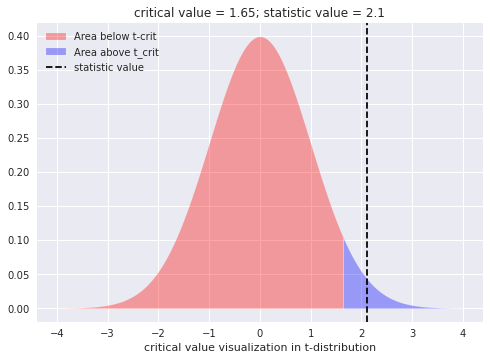

In [29]:
male = data_source[data_source['sex']=='male']["charges"]
female = data_source[data_source['sex']=='female']["charges"]
alpha=0.05
stat, p = ttest_ind(male, female, equal_var=False, alternative='greater')

if p < alpha:
    print('Reject Ho. Hence in a Population, male insurance charge is higher than female insurance charge') 
else:
    print('Fail to reject Ho, there are not enough evidence to prove male insurance charge is higher than female insurance charge in a population')
    
df=(len(male)+len(female)-2)
t_crit = -t.ppf(alpha,df=df)
plt.style.use('seaborn')

plt.fill_between(x=np.arange(-4,t_crit,0.01),
                 y1= t.pdf(np.arange(-4,t_crit,0.01), df=df) ,
                 facecolor='red',
                 alpha=0.35,
                 label= 'Area below t-crit')

plt.fill_between(x=np.arange(t_crit,4,0.01), 
                     y1= t.pdf(np.arange(t_crit,4,0.01), df=df) ,
                     facecolor='blue',
                     alpha=0.35, 
                     label= 'Area above t_crit')
plt.axvline(x=stat, color="black", linestyle="--", label=f"statistic value")
plt.legend()
plt.xlabel("critical value visualization in t-distribution")
plt.title(f'critical value = {round(t_crit,2)}; statistic value = {round(stat,2)}')
plt.show()

__Note :__
- from the dual mean test, we are **95%** confident that in a population of insurance users, **male insurance charge is higher than female insurance charge in a population**. 

---
# D. Data Analysis Summary

There are __several factors__ that affect insurance user charges determination like __smoking, BMI value, age, gender, region, and the number of children in a family__. Of those factors, the most __key factor__ to determine __how expensive__ insurance charges will users have is the __smoking habit__. Analysis shows that people who smoke will get insurance charges higher than people who don’t smoke, the __charges for smokers are around \\$18750__ for smokers with __relatively a good value of BMI__, and around __\\$40000__ for smokers with a __bad value of BMI__. Whereas insurance charges for __non-smokers__ are just around __\\$4000__. __BMI__ also becomes the __second most contributing factor for insurance charge determination__, but the BMI contribution to charges determination is __larger in smoker people__. The analysis also shows that __as people get older__, the insurance __charge is getting expensive__, this age factor is also different in smokers and non-smokers people. The rest of the factor such as __gender, region, and the number of children__ in a family does contribute to the determination of insurance charge but the value is __very small__ compared to smoking, BMI, and age factor.